In [130]:
# Import packages
from collections import Counter
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

import time
import warnings

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from math import sqrt

from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from mlxtend.feature_selection import SequentialFeatureSelector


from sklearn.model_selection import cross_val_score , GridSearchCV
from sklearn import metrics


from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

import seaborn as sns 
from sklearn.svm import SVC


from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn import linear_model
import ast

warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams.update({"font.size": 12})


In [131]:
#Load Dataset
#Independent Variables Dataset
df_comments = pd.read_csv("data/features_sp500.csv", delimiter=";",  encoding="utf-8")
#Dependent Variables Dataset
SP500 = pd.read_csv("data/SandP_500_withHighLow.csv", sep=",")

In [132]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Columns: 1856 entries, created_utc to BAGHOLDER
dtypes: float64(1851), int64(4), object(1)
memory usage: 6.3+ MB


In [133]:
df_comments.head()

created_utc  title_polarity  title_subjectivity  submission_body_polarity  \
0  2020-01-01        7.303436           21.868398                  6.478874   
1  2020-01-02        4.819957           36.665525                  0.440766   
2  2020-01-03        4.492971           28.560375                  5.997937   
3  2020-01-04        1.844444            4.022222                  0.093232   
4  2020-01-05        1.537381           15.433770                  4.989659   

   submission_body_subjectivity  submission_count  submission_score  \
0                     33.971240               104               104   
1                     52.279186               139              2192   
2                     41.947068               115             36580   
3                      7.623026                28             16584   
4                     22.903422                67               460   

   upvote_ratio  comment_body_polarity  comment_body_subjectivity  ...  DD.2  \
0           0.0             130.939615                 820.633747  ...  23.0   
1           0.0             532.971197                4045.896734  ...  32.0   
2           0.0             572.975674                5150.854530  ...  44.0   
3           0.0             275.415978                1741.325526  ...  25.0   
4           0.0             253.327217                1925.347894  ...  21.0   

   buying  high  BUY  holding   GO  squeeze  BUYING  TENDIES  BAGHOLDER  
0     7.0   5.0  1.0      2.0  NaN      NaN     NaN      NaN        NaN  
1    31.0  15.0  6.0     31.0  9.0      2.0     3.0      NaN        NaN  
2    27.0  20.0  7.0     32.0  9.0      2.0     2.0      2.0        NaN  
3    10.0  14.0  NaN      7.0  NaN      2.0     NaN      1.0        NaN  
4    11.0   9.0  2.0     13.0  1.0      NaN     NaN      NaN        NaN  

[5 rows x 1856 columns]

In [134]:
df_comments.set_index('created_utc',inplace=True)

In [135]:
df_comments.tail()

title_polarity  title_subjectivity  submission_body_polarity  \
created_utc                                                                 
2021-03-27         8.446676           33.257374                  6.096034   
2021-03-28        32.854605          109.840038                 16.024446   
2021-03-29        56.175202          301.651219                 38.316436   
2021-03-30        63.219496          262.440205                 37.621248   
2021-03-31        56.813573          281.942590                 44.933902   

             submission_body_subjectivity  submission_count  submission_score  \
created_utc                                                                     
2021-03-27                      24.403107               165               183   
2021-03-28                      59.274937               444               764   
2021-03-29                     178.934077              1187              1253   
2021-03-30                     171.155115              1180              1200   
2021-03-31                     199.390178              1209              1231   

             upvote_ratio  comment_body_polarity  comment_body_subjectivity  \
created_utc                                                                   
2021-03-27         164.13              80.916034                 363.794892   
2021-03-28         431.25            1155.309506                5202.869285   
2021-03-29        1183.16            3854.146727               24189.232163   
2021-03-30        1178.24            4048.448978               23129.645792   
2021-03-31        1206.68            3638.755989               21973.660961   

             comment_count  ...   DD.2  buying  high   BUY  holding    GO  \
created_utc                 ...                                             
2021-03-27          1156.0  ...   21.0    10.0   5.0   1.0      8.0   NaN   
2021-03-28         15497.0  ...  144.0    59.0  30.0   6.0     41.0   2.0   
2021-03-29         77539.0  ...  447.0   193.0  89.0  42.0    139.0  19.0   
2021-03-30         74152.0  ...  376.0   152.0  85.0  34.0    120.0  43.0   
2021-03-31         70326.0  ...  421.0   153.0  93.0  49.0    109.0  28.0   

             squeeze  BUYING  TENDIES  BAGHOLDER  
created_utc                                       
2021-03-27      12.0     NaN      NaN        NaN  
2021-03-28      38.0     1.0      2.0        NaN  
2021-03-29     178.0    10.0      7.0        NaN  
2021-03-30     127.0     4.0      9.0        NaN  
2021-03-31     144.0     4.0      3.0        NaN  

[5 rows x 1855 columns]

In [136]:
df_comments = df_comments[~df_comments.index.duplicated(keep='first')]


In [137]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 443 entries, 2020-01-01 to 2021-03-31
Columns: 1855 entries, title_polarity to BAGHOLDER
dtypes: float64(1851), int64(4)
memory usage: 6.3+ MB


In [138]:
df_comments.describe()

title_polarity  title_subjectivity  submission_body_polarity  \
count      443.000000          443.000000                443.000000   
mean        14.537286          156.427513                 15.484208   
std         35.929044          537.983705                 34.861226   
min        -21.581163            3.839683                 -2.282257   
25%          2.689167           45.433838                  6.460240   
50%          6.369248           73.400514                 10.009150   
75%         13.812426          127.810205                 13.936974   
max        535.607415         9509.963580                560.186794   

       submission_body_subjectivity  submission_count  submission_score  \
count                    443.000000        443.000000      4.430000e+02   
mean                     151.189946        678.720090      4.617169e+04   
std                      467.054727       2447.165716      3.140796e+05   
min                        1.461834         12.000000      3.100000e+01   
25%                       58.661751        206.500000      3.040000e+02   
50%                       91.043298        327.000000      5.750000e+02   
75%                      134.459017        544.000000      2.081500e+03   
max                     8483.404539      42898.000000      4.315205e+06   

       upvote_ratio  comment_body_polarity  comment_body_subjectivity  \
count    443.000000             438.000000                 438.000000   
mean     565.842099            2114.959322               18581.256645   
std     2426.463128            2438.056854               21605.877897   
min        0.000000               2.618842                  33.762071   
25%        0.000000            1111.788159                9146.453981   
50%      231.000000            1635.806388               15433.488013   
75%      423.985000            2145.751236               20478.480102   
max    42746.920000           24582.360475              252889.928549   

       comment_count  ...         DD.2       buying         high          BUY  \
count   4.380000e+02  ...   442.000000   442.000000   442.000000   433.000000   
mean    6.059937e+04  ...   279.726244   156.402715    74.671946    65.697460   
std     7.707322e+04  ...   255.402141   424.423462   130.992214   388.620004   
min     1.120000e+02  ...     1.000000     1.000000     1.000000     1.000000   
25%     2.892075e+04  ...   143.250000    52.000000    32.250000     5.000000   
50%     5.037950e+04  ...   219.000000    85.000000    49.000000    11.000000   
75%     6.563450e+04  ...   325.750000   124.750000    68.750000    20.000000   
max     1.090474e+06  ...  1934.000000  6235.000000  1471.000000  5448.000000   

           holding           GO      squeeze      BUYING     TENDIES  \
count   442.000000   429.000000   431.000000  340.000000  350.000000   
mean    125.918552    28.128205    94.187935   13.250000    7.311429   
std     322.354522   114.572998   337.723176   63.938156   25.142633   
min       1.000000     1.000000     1.000000    1.000000    1.000000   
25%      34.250000     5.000000     4.000000    2.000000    1.000000   
50%      67.000000    11.000000     9.000000    3.000000    3.000000   
75%     105.750000    18.000000    34.000000    5.000000    5.000000   
max    3609.000000  1554.000000  3684.000000  875.000000  326.000000   

       BAGHOLDER  
count   28.00000  
mean     1.50000  
std      0.96225  
min      1.00000  
25%      1.00000  
50%      1.00000  
75%      1.25000  
max      4.00000  

[8 rows x 1855 columns]

In [139]:
SP500.head()

Date        Open        High         Low       Close     Volume  \
0  2017-02-28  218.779483  219.038316  218.178624  218.594604   96961900   
1  2017-03-01  220.369463  222.153576  220.350971  221.654388  149158200   
2  2017-03-02  221.451009  221.460262  220.203067  220.258530   70246000   
3  2017-03-03  220.166084  220.572826  219.759343  220.397186   81974300   
4  2017-03-06  219.546728  220.119856  219.093764  219.740860   55391500   

   Dividends  Stock Splits  Closing Delta  Closing Movement  
0        0.0             0           0.00                 0  
1        0.0             0           3.06                 1  
2        0.0             0          -1.40                -1  
3        0.0             0           0.14                 1  
4        0.0             0          -0.66                -1

In [140]:
SP500 = SP500[["Date","Close","Closing Movement"]]

In [141]:
#NOT USED for now, think what to do with these features

# # Create the feature dataframe that will be feed into machine learning model
# df_features_comments = pd.concat([
#                         df_comments["body_polarity"]/df_comments["count"],
#                         df_comments["score_x"]/df_comments["count"]],
#                         axis=1)

# df_features_comments.columns = ["comment_polarity", "comment_score"]

# df_features_comments = pd.concat([df_features_comments,                       
#                          df_comments_emojis,
#                          df_comments_sp500_stocks,                          
#                          df_comments_sp500_lingos], axis=1)

# column_names = []
# for col in df_features_comments.columns:
#     name = col.replace("'", "").replace("]", "").replace(" ", "")
#     column_names.append(name)
    
# df_features_comments.columns = column_names

In [142]:
df_features = df_comments

In [143]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 443 entries, 2020-01-01 to 2021-03-31
Columns: 1855 entries, title_polarity to BAGHOLDER
dtypes: float64(1851), int64(4)
memory usage: 6.3+ MB


In [144]:
#replace Nan with 0
df_features = df_features.fillna(0)

In [145]:
df_features.head()

title_polarity  title_subjectivity  submission_body_polarity  \
created_utc                                                                 
2020-01-01         7.303436           21.868398                  6.478874   
2020-01-02         4.819957           36.665525                  0.440766   
2020-01-03         4.492971           28.560375                  5.997937   
2020-01-04         1.844444            4.022222                  0.093232   
2020-01-05         1.537381           15.433770                  4.989659   

             submission_body_subjectivity  submission_count  submission_score  \
created_utc                                                                     
2020-01-01                      33.971240               104               104   
2020-01-02                      52.279186               139              2192   
2020-01-03                      41.947068               115             36580   
2020-01-04                       7.623026                28             16584   
2020-01-05                      22.903422                67               460   

             upvote_ratio  comment_body_polarity  comment_body_subjectivity  \
created_utc                                                                   
2020-01-01            0.0             130.939615                 820.633747   
2020-01-02            0.0             532.971197                4045.896734   
2020-01-03            0.0             572.975674                5150.854530   
2020-01-04            0.0             275.415978                1741.325526   
2020-01-05            0.0             253.327217                1925.347894   

             comment_count  ...  DD.2  buying  high  BUY  holding   GO  \
created_utc                 ...                                          
2020-01-01          2543.0  ...  23.0     7.0   5.0  1.0      2.0  0.0   
2020-01-02         12594.0  ...  32.0    31.0  15.0  6.0     31.0  9.0   
2020-01-03         16276.0  ...  44.0    27.0  20.0  7.0     32.0  9.0   
2020-01-04          5419.0  ...  25.0    10.0  14.0  0.0      7.0  0.0   
2020-01-05          6162.0  ...  21.0    11.0   9.0  2.0     13.0  1.0   

             squeeze  BUYING  TENDIES  BAGHOLDER  
created_utc                                       
2020-01-01       0.0     0.0      0.0        0.0  
2020-01-02       2.0     3.0      0.0        0.0  
2020-01-03       2.0     2.0      2.0        0.0  
2020-01-04       2.0     0.0      1.0        0.0  
2020-01-05       0.0     0.0      0.0        0.0  

[5 rows x 1855 columns]

In [146]:
df_features.shape

(443, 1855)

In [147]:
df_features.describe()

title_polarity  title_subjectivity  submission_body_polarity  \
count      443.000000          443.000000                443.000000   
mean        14.537286          156.427513                 15.484208   
std         35.929044          537.983705                 34.861226   
min        -21.581163            3.839683                 -2.282257   
25%          2.689167           45.433838                  6.460240   
50%          6.369248           73.400514                 10.009150   
75%         13.812426          127.810205                 13.936974   
max        535.607415         9509.963580                560.186794   

       submission_body_subjectivity  submission_count  submission_score  \
count                    443.000000        443.000000      4.430000e+02   
mean                     151.189946        678.720090      4.617169e+04   
std                      467.054727       2447.165716      3.140796e+05   
min                        1.461834         12.000000      3.100000e+01   
25%                       58.661751        206.500000      3.040000e+02   
50%                       91.043298        327.000000      5.750000e+02   
75%                      134.459017        544.000000      2.081500e+03   
max                     8483.404539      42898.000000      4.315205e+06   

       upvote_ratio  comment_body_polarity  comment_body_subjectivity  \
count    443.000000             443.000000                 443.000000   
mean     565.842099            2091.088449               18371.535915   
std     2426.463128            2434.524403               21573.012485   
min        0.000000               0.000000                   0.000000   
25%        0.000000            1087.708502                8978.360351   
50%      231.000000            1632.767239               15370.494150   
75%      423.985000            2140.903162               20418.679947   
max    42746.920000           24582.360475              252889.928549   

       comment_count  ...         DD.2       buying         high          BUY  \
count   4.430000e+02  ...   443.000000   443.000000   443.000000   443.000000   
mean    5.991540e+04  ...   279.094808   156.049661    74.503386    64.214447   
std     7.690355e+04  ...   255.459005   424.008193   130.892038   384.322895   
min     0.000000e+00  ...     0.000000     0.000000     0.000000     0.000000   
25%     2.782750e+04  ...   143.000000    51.500000    32.000000     4.500000   
50%     5.019500e+04  ...   219.000000    85.000000    49.000000    11.000000   
75%     6.552200e+04  ...   325.500000   124.500000    68.500000    19.000000   
max     1.090474e+06  ...  1934.000000  6235.000000  1471.000000  5448.000000   

           holding           GO      squeeze      BUYING     TENDIES  \
count   443.000000   443.000000   443.000000  443.000000  443.000000   
mean    125.634312    27.239278    91.636569   10.169300    5.776524   
std     322.045234   112.851468   333.458697   56.274624   22.539502   
min       0.000000     0.000000     0.000000    0.000000    0.000000   
25%      34.000000     4.000000     4.000000    1.000000    1.000000   
50%      67.000000    10.000000     8.000000    2.000000    2.000000   
75%     105.500000    17.500000    34.000000    4.000000    4.000000   
max    3609.000000  1554.000000  3684.000000  875.000000  326.000000   

        BAGHOLDER  
count  443.000000  
mean     0.094808  
std      0.435989  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      4.000000  

[8 rows x 1855 columns]

In [148]:
# Join Labels with features
SP500.set_index("Date", inplace=True)
SP500["created_utc"] = SP500.index
SP500.set_index("created_utc", inplace=True)
dataset_with_labels = df_features.join(SP500, how='inner')

In [149]:
dataset_with_labels.head()

title_polarity  title_subjectivity  submission_body_polarity  \
created_utc                                                                 
2020-01-02         4.819957           36.665525                  0.440766   
2020-01-03         4.492971           28.560375                  5.997937   
2020-01-06         2.237558           26.646118                  1.099999   
2020-01-07         0.928602           33.124699                  2.678287   
2020-01-08        -4.471613           46.010141                  5.871738   

             submission_body_subjectivity  submission_count  submission_score  \
created_utc                                                                     
2020-01-02                      52.279186               139              2192   
2020-01-03                      41.947068               115             36580   
2020-01-06                      47.910753               141               142   
2020-01-07                      58.454821               143               143   
2020-01-08                      95.186840               226               226   

             upvote_ratio  comment_body_polarity  comment_body_subjectivity  \
created_utc                                                                   
2020-01-02            0.0             532.971197                4045.896734   
2020-01-03            0.0             572.975674                5150.854530   
2020-01-06            0.0             498.933519                4028.524789   
2020-01-07            0.0             439.226358                4134.806548   
2020-01-08            0.0             560.857685                7624.799750   

             comment_count  ...  high  BUY  holding    GO  squeeze  BUYING  \
created_utc                 ...                                              
2020-01-02         12594.0  ...  15.0  6.0     31.0   9.0      2.0     3.0   
2020-01-03         16276.0  ...  20.0  7.0     32.0   9.0      2.0     2.0   
2020-01-06         12821.0  ...  24.0  2.0     20.0   4.0      1.0     1.0   
2020-01-07         13415.0  ...  19.0  3.0     31.0   3.0      2.0     0.0   
2020-01-08         24207.0  ...  21.0  5.0     43.0  12.0      4.0     1.0   

             TENDIES  BAGHOLDER       Close  Closing Movement  
created_utc                                                    
2020-01-02       0.0        0.0  317.873199                 1  
2020-01-03       2.0        0.0  315.466217                -1  
2020-01-06       0.0        0.0  316.669739                 1  
2020-01-07       1.0        0.0  315.779327                -1  
2020-01-08       1.0        0.0  317.462311                 1  

[5 rows x 1857 columns]

In [150]:
# assign Price of trade day +1 to current day
dataset_with_labels["Close"] = dataset_with_labels["Close"].shift(1)
dataset_with_labels["Closing Movement"] = dataset_with_labels["Closing Movement"].shift(1)

In [151]:
dataset_with_labels.head()

title_polarity  title_subjectivity  submission_body_polarity  \
created_utc                                                                 
2020-01-02         4.819957           36.665525                  0.440766   
2020-01-03         4.492971           28.560375                  5.997937   
2020-01-06         2.237558           26.646118                  1.099999   
2020-01-07         0.928602           33.124699                  2.678287   
2020-01-08        -4.471613           46.010141                  5.871738   

             submission_body_subjectivity  submission_count  submission_score  \
created_utc                                                                     
2020-01-02                      52.279186               139              2192   
2020-01-03                      41.947068               115             36580   
2020-01-06                      47.910753               141               142   
2020-01-07                      58.454821               143               143   
2020-01-08                      95.186840               226               226   

             upvote_ratio  comment_body_polarity  comment_body_subjectivity  \
created_utc                                                                   
2020-01-02            0.0             532.971197                4045.896734   
2020-01-03            0.0             572.975674                5150.854530   
2020-01-06            0.0             498.933519                4028.524789   
2020-01-07            0.0             439.226358                4134.806548   
2020-01-08            0.0             560.857685                7624.799750   

             comment_count  ...  high  BUY  holding    GO  squeeze  BUYING  \
created_utc                 ...                                              
2020-01-02         12594.0  ...  15.0  6.0     31.0   9.0      2.0     3.0   
2020-01-03         16276.0  ...  20.0  7.0     32.0   9.0      2.0     2.0   
2020-01-06         12821.0  ...  24.0  2.0     20.0   4.0      1.0     1.0   
2020-01-07         13415.0  ...  19.0  3.0     31.0   3.0      2.0     0.0   
2020-01-08         24207.0  ...  21.0  5.0     43.0  12.0      4.0     1.0   

             TENDIES  BAGHOLDER       Close  Closing Movement  
created_utc                                                    
2020-01-02       0.0        0.0         NaN               NaN  
2020-01-03       2.0        0.0  317.873199               1.0  
2020-01-06       0.0        0.0  315.466217              -1.0  
2020-01-07       1.0        0.0  316.669739               1.0  
2020-01-08       1.0        0.0  315.779327              -1.0  

[5 rows x 1857 columns]

In [152]:
dataset_with_labels = dataset_with_labels.iloc[1:]

In [153]:
dataset_with_labels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 2020-01-03 to 2021-03-31
Columns: 1857 entries, title_polarity to Closing Movement
dtypes: float64(1853), int64(4)
memory usage: 4.3+ MB


In [154]:
dataset_with_labels = dataset_with_labels[~dataset_with_labels.index.duplicated(keep='first')]

In [155]:
dataset_with_labels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 2020-01-03 to 2021-03-31
Columns: 1857 entries, title_polarity to Closing Movement
dtypes: float64(1853), int64(4)
memory usage: 4.3+ MB


In [156]:
dataset_with_labels.loc[(dataset_with_labels['Closing Movement'] == -1),'Closing Movement']=0

In [157]:
#backup
#Dataset = dataset_with_labels

In [158]:
labels_clsfier = dataset_with_labels.pop('Closing Movement')
labels_reg_actual = dataset_with_labels['Close']

In [159]:
#Feature Normalization -> dataset 1
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(dataset_with_labels)

# transform training data
norm_features = norm.transform(dataset_with_labels)


In [160]:
# Creating backup the dataframe of the scaled data
dataset = pd.DataFrame(norm_features, index=dataset_with_labels.index, columns=dataset_with_labels.columns)
dataset.head()

title_polarity  title_subjectivity  submission_body_polarity  \
created_utc                                                                 
2020-01-03         0.046796            0.002195                  0.010796   
2020-01-06         0.042748            0.001994                  0.002054   
2020-01-07         0.040399            0.002676                  0.004871   
2020-01-08         0.030707            0.004032                  0.010571   
2020-01-09         0.031320            0.003701                  0.010664   

             submission_body_subjectivity  submission_count  submission_score  \
created_utc                                                                     
2020-01-03                       0.004422          0.001960          0.008470   
2020-01-06                       0.005126          0.002566          0.000026   
2020-01-07                       0.006369          0.002613          0.000026   
2020-01-08                       0.010701          0.004549          0.000045   
2020-01-09                       0.008956          0.003919          0.000039   

             upvote_ratio  comment_body_polarity  comment_body_subjectivity  \
created_utc                                                                   
2020-01-03            0.0               0.023308                   0.020368   
2020-01-06            0.0               0.020296                   0.015930   
2020-01-07            0.0               0.017868                   0.016350   
2020-01-08            0.0               0.022815                   0.030151   
2020-01-09            0.0               0.022964                   0.019365   

             comment_count  ...    buying      high       BUY   holding  \
created_utc                 ...                                           
2020-01-03        0.014926  ...  0.004330  0.013596  0.001285  0.008867   
2020-01-06        0.011757  ...  0.004491  0.016315  0.000367  0.005542   
2020-01-07        0.012302  ...  0.004491  0.012916  0.000551  0.008590   
2020-01-08        0.022199  ...  0.008019  0.014276  0.000918  0.011915   
2020-01-09        0.014533  ...  0.004170  0.016995  0.000551  0.005542   

                   GO   squeeze    BUYING   TENDIES  BAGHOLDER     Close  
created_utc                                                               
2020-01-03   0.005792  0.000543  0.002286  0.006135        0.0  0.557644  
2020-01-06   0.002574  0.000271  0.001143  0.000000        0.0  0.544010  
2020-01-07   0.001931  0.000543  0.000000  0.003067        0.0  0.550827  
2020-01-08   0.007722  0.001086  0.001143  0.003067        0.0  0.545783  
2020-01-09   0.004505  0.000543  0.001143  0.003067        0.0  0.555317  

[5 rows x 1856 columns]

In [161]:
#Standardize the Data -> dataset 2

std = StandardScaler().fit(dataset_with_labels)

# transform training data
std_features = std.transform(dataset_with_labels)

In [162]:
# Creating backup the dataframe of the std data
dataset_std = pd.DataFrame(std_features, index=dataset_with_labels.index, columns=dataset_with_labels.columns)
dataset_std.head()

title_polarity  title_subjectivity  submission_body_polarity  \
created_utc                                                                 
2020-01-03        -0.304956           -0.261339                 -0.308109   
2020-01-06        -0.359555           -0.264318                 -0.426878   
2020-01-07        -0.391242           -0.254236                 -0.388606   
2020-01-08        -0.521969           -0.234185                 -0.311169   
2020-01-09        -0.513696           -0.239067                 -0.309905   

             submission_body_subjectivity  submission_count  submission_score  \
created_utc                                                                     
2020-01-03                      -0.261610         -0.252227         -0.060462   
2020-01-06                      -0.250922         -0.243342         -0.160369   
2020-01-07                      -0.232026         -0.242659         -0.160366   
2020-01-08                      -0.166198         -0.214297         -0.160138   
2020-01-09                      -0.192728         -0.223523         -0.160212   

             upvote_ratio  comment_body_polarity  comment_body_subjectivity  \
created_utc                                                                   
2020-01-03      -0.248485              -0.751078                  -0.726689   
2020-01-06      -0.248485              -0.781118                  -0.774935   
2020-01-07      -0.248485              -0.805343                  -0.770366   
2020-01-08      -0.248485              -0.755995                  -0.620340   
2020-01-09      -0.248485              -0.754513                  -0.737591   

             comment_count  ...    buying      high       BUY   holding  \
created_utc                 ...                                           
2020-01-03       -0.658592  ... -0.336282 -0.484586 -0.170113 -0.351594   
2020-01-06       -0.699036  ... -0.334130 -0.454115 -0.181066 -0.387005   
2020-01-07       -0.692082  ... -0.334130 -0.492204 -0.178876 -0.354545   
2020-01-08       -0.565751  ... -0.286777 -0.476968 -0.174494 -0.319134   
2020-01-09       -0.663602  ... -0.338434 -0.446497 -0.178876 -0.387005   

                   GO   squeeze    BUYING   TENDIES  BAGHOLDER     Close  
created_utc                                                               
2020-01-03  -0.202445 -0.288623 -0.172937 -0.210325  -0.260524 -0.265287  
2020-01-06  -0.239953 -0.291496 -0.187902 -0.285107  -0.260524 -0.327434  
2020-01-07  -0.247454 -0.288623 -0.202868 -0.247716  -0.260524 -0.296360  
2020-01-08  -0.179940 -0.282877 -0.187902 -0.247716  -0.260524 -0.319349  
2020-01-09  -0.217448 -0.288623 -0.187902 -0.247716  -0.260524 -0.275896  

[5 rows x 1856 columns]

In [163]:
labels_reg_norm = dataset.pop('Close')
labels_reg_std = dataset_std.pop('Close')

In [164]:
dataset.describe()

title_polarity  title_subjectivity  submission_body_polarity  \
count      304.000000          304.000000                304.000000   
mean         0.069405            0.019870                  0.033476   
std          0.074260            0.067741                  0.073732   
min          0.000000            0.000000                  0.000000   
25%          0.043866            0.005064                  0.015263   
50%          0.051782            0.008242                  0.020905   
75%          0.067221            0.014321                  0.027379   
max          1.000000            1.000000                  1.000000   

       submission_body_subjectivity  submission_count  submission_score  \
count                    304.000000        304.000000        304.000000   
mean                       0.021639          0.019179          0.013580   
std                        0.065918          0.068381          0.084660   
min                        0.000000          0.000000          0.000000   
25%                        0.009083          0.005523          0.000075   
50%                        0.012253          0.008176          0.000154   
75%                        0.016586          0.013554          0.000567   
max                        1.000000          1.000000          1.000000   

       upvote_ratio  comment_body_polarity  comment_body_subjectivity  \
count    304.000000             304.000000                 304.000000   
mean       0.016880               0.098616                   0.087214   
std        0.068043               0.100431                   0.092138   
min        0.000000               0.000000                   0.000000   
25%        0.000000               0.061374                   0.055180   
50%        0.006733               0.078534                   0.070083   
75%        0.012233               0.094511                   0.090605   
max        1.000000               1.000000                   1.000000   

       comment_count  ...        DD.2      buying        high         BUY  \
count     304.000000  ...  304.000000  304.000000  304.000000  304.000000   
mean        0.066519  ...    0.165494    0.029388    0.056840    0.015539   
std         0.078468  ...    0.137567    0.074638    0.089386    0.083928   
min         0.000000  ...    0.000000    0.000000    0.000000    0.000000   
25%         0.042121  ...    0.100052    0.012189    0.027192    0.001652   
50%         0.053216  ...    0.129007    0.016600    0.039089    0.002753   
75%         0.067840  ...    0.181618    0.021692    0.049116    0.004268   
max         1.000000  ...    1.000000    1.000000    1.000000    1.000000   

          holding          GO     squeeze      BUYING     TENDIES   BAGHOLDER  
count  304.000000  304.000000  304.000000  304.000000  304.000000  304.000000  
mean     0.041881    0.023158    0.027815    0.015492    0.023390    0.033717  
std      0.094053    0.085923    0.094646    0.076493    0.082173    0.129634  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.016071    0.006435    0.001357    0.001143    0.003067    0.000000  
50%      0.022998    0.009009    0.002986    0.003429    0.009202    0.000000  
75%      0.031865    0.013031    0.010993    0.005714    0.015337    0.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000  

[8 rows x 1855 columns]

In [165]:
dataset_std.describe()

title_polarity  title_subjectivity  submission_body_polarity  \
count    3.040000e+02        3.040000e+02              3.040000e+02   
mean     2.191230e-17        8.043639e-17             -1.205176e-16   
std      1.001649e+00        1.001649e+00              1.001649e+00   
min     -9.361552e-01       -2.937986e-01             -4.547771e-01   
25%     -3.444747e-01       -2.189181e-01             -2.474245e-01   
50%     -2.377079e-01       -1.719319e-01             -1.707833e-01   
75%     -2.945547e-02       -8.203709e-02             -8.282916e-02   
max      1.255220e+01        1.449260e+01              1.313026e+01   

       submission_body_subjectivity  submission_count  submission_score  \
count                  3.040000e+02      3.040000e+02      3.040000e+02   
mean                  -2.463992e-17      4.391589e-17      7.742345e-17   
std                    1.001649e+00      1.001649e+00      1.001649e+00   
min                   -3.288107e-01     -2.809305e-01     -1.606731e-01   
25%                   -1.907861e-01     -2.000303e-01     -1.597902e-01   
50%                   -1.426199e-01     -1.611607e-01     -1.588511e-01   
75%                   -7.678615e-02     -8.239625e-02     -1.539672e-01   
max                    1.486653e+01      1.436721e+01      1.167078e+01   

       upvote_ratio  comment_body_polarity  comment_body_subjectivity  \
count  3.040000e+02           3.040000e+02               3.040000e+02   
mean   1.451690e-17           5.277211e-17              -1.113290e-16   
std    1.001649e+00           1.001649e+00               1.001649e+00   
min   -2.484853e-01          -9.835447e-01              -9.481119e-01   
25%   -2.484853e-01          -3.714303e-01              -3.482405e-01   
50%   -1.493715e-01          -2.002876e-01              -1.862275e-01   
75%   -6.840526e-02          -4.093811e-02               3.686472e-02   
max    1.447237e+01           8.989961e+00               9.923019e+00   

       comment_count  ...          DD.2        buying          high  \
count   3.040000e+02  ...  3.040000e+02  3.040000e+02  3.040000e+02   
mean    1.056355e-16  ... -9.166644e-17  7.892992e-17 -1.547099e-16   
std     1.001649e+00  ...  1.001649e+00  1.001649e+00  1.001649e+00   
min    -8.491183e-01  ... -1.204991e+00 -3.943964e-01 -6.369434e-01   
25%    -3.114385e-01  ... -4.764976e-01 -2.308150e-01 -3.322290e-01   
50%    -1.698077e-01  ... -2.656676e-01 -1.716244e-01 -1.989164e-01   
75%     1.686491e-02  ...  1.174030e-01 -1.032862e-01 -8.655294e-02   
max     1.191597e+01  ...  6.076174e+00  1.302573e+01  1.056893e+01   

                BUY       holding            GO       squeeze        BUYING  \
count  3.040000e+02  3.040000e+02  3.040000e+02  3.040000e+02  3.040000e+02   
mean  -8.500145e-17 -1.541621e-16 -1.359932e-16 -1.250827e-17 -1.893588e-16   
std    1.001649e+00  1.001649e+00  1.001649e+00  1.001649e+00  1.001649e+00   
min   -1.854475e-01 -4.460231e-01 -2.699590e-01 -2.943683e-01 -2.028676e-01   
25%   -1.657318e-01 -2.748707e-01 -1.949430e-01 -2.800047e-01 -1.879024e-01   
50%   -1.525880e-01 -2.010982e-01 -1.649365e-01 -2.627684e-01 -1.579719e-01   
75%   -1.345152e-01 -1.066693e-01 -1.180515e-01 -1.780233e-01 -1.280414e-01   
max    1.174915e+01  1.020378e+01  1.138753e+01  1.028872e+01  1.289172e+01   

            TENDIES     BAGHOLDER  
count  3.040000e+02  3.040000e+02  
mean  -6.342697e-16  4.309418e-16  
std    1.001649e+00  1.001649e+00  
min   -2.851069e-01 -2.605237e-01  
25%   -2.477158e-01 -2.605237e-01  
50%   -1.729337e-01 -2.605237e-01  
75%   -9.815154e-02 -2.605237e-01  
max    1.190438e+01  7.466227e+00  

[8 rows x 1855 columns]

In [166]:
#Drop DD.2 column
dataset = dataset.drop(columns=['DD.2'])
dataset_std = dataset_std.drop(columns=['DD.2'])

In [167]:
dataset_with_labels = dataset_with_labels.drop(columns=['DD.2'])

In [168]:
# for column in dataset:
#     fig, ax = plt.subplots(figsize=(30,30))
#     dataset[column].hist( ax=ax)
#     fig.suptitle(column)
#     fig.savefig("plots_t1/histogram_normalized_"+column+".png")

In [169]:
# for column in dataset_with_labels:
#     fig, ax = plt.subplots(figsize=(30,30))
#     dataset_with_labels[column].hist( ax=ax)
#     fig.suptitle(column)
#     fig.savefig("plots_t1/histogram_original_"+column+".png")

In [170]:
# #Remove some of the highly correlated independent variables. (if multicollinearity problem)

# plt.rcParams.update({"font.size": 12})
# cm = np.corrcoef(dataset_with_labels.values.T) 
# f, ax = plt.subplots(figsize =(60, 60)) #figsize =(100, 100)
# heatmap = sns.heatmap(cm, ax = ax, cmap ="YlGnBu",annot=True,linewidths = 0.1,yticklabels = dataset_with_labels.columns,xticklabels = dataset_with_labels.columns) 
# fig = heatmap.get_figure()
# fig.savefig("plots_t1/heatmap/heatmap_original.png")

In [171]:

# plt.rcParams.update({"font.size": 12})
# cm = np.corrcoef(dataset.values.T) 
# f, ax = plt.subplots(figsize =(60, 60)) #figsize =(100, 100)
# heatmap = sns.heatmap(cm, ax = ax, cmap ="YlGnBu",annot=True,linewidths = 0.1,yticklabels = dataset.columns,xticklabels = dataset.columns) 
# fig = heatmap.get_figure()
# fig.savefig("plots_t1/heatmap/heatmap_normalized.png")

In [172]:
#PCA

In [173]:
# Partitioning the dataset into test and train (test = (25% of total data) and train = (75% of total data) )
X_train, X_test, y_train, y_test = train_test_split(dataset, labels_clsfier, test_size=0.25, random_state = 4,stratify=labels_clsfier)


In [174]:
y_train

created_utc
2020-07-29    0.0
2020-08-11    1.0
2020-08-24    1.0
2020-10-13    1.0
2020-02-06    1.0
             ... 
2020-02-21    0.0
2020-09-08    0.0
2020-08-31    1.0
2020-11-27    0.0
2020-11-04    1.0
Name: Closing Movement, Length: 228, dtype: float64

In [175]:
y_test

created_utc
2020-05-29    0.0
2021-03-12    1.0
2020-04-28    1.0
2021-01-27    0.0
2020-03-09    0.0
             ... 
2020-03-05    1.0
2020-09-01    0.0
2020-09-21    0.0
2020-04-20    1.0
2020-12-29    1.0
Name: Closing Movement, Length: 76, dtype: float64

Decision Tree
---------------


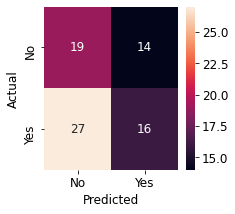

0.6060923313573401
0.5679738562091503
0.49978494623655906
0.5117144293614881

---------------
Means Cross Validation Accuracy Score :0.7071484110255553
Precision : From the Prediction of High, 62.0% values are predicted correctly
Recall : From overall High, 57.99999999999999% values are predicted correctly
AUC : 51.0%
---------------
------
True Nagatives: 19
Specificity: 0.5757575757575758
              precision    recall  f1-score   support

         Low       0.41      0.58      0.48        33
        High       0.53      0.37      0.44        43

    accuracy                           0.46        76
   macro avg       0.47      0.47      0.46        76
weighted avg       0.48      0.46      0.46        76

roc_auc: 0.4739252995066948
Random Forest
---------------


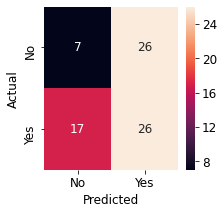

0.6042741030898925
0.7147058823529411
0.5555913978494622
0.4723479135243841

---------------
Means Cross Validation Accuracy Score :0.7301978220291534
Precision : From the Prediction of High, 57.99999999999999% values are predicted correctly
Recall : From overall High, 74.0% values are predicted correctly
AUC : 48.0%
---------------
------
True Nagatives: 7
Specificity: 0.21212121212121213
              precision    recall  f1-score   support

         Low       0.29      0.21      0.25        33
        High       0.50      0.60      0.55        43

    accuracy                           0.43        76
   macro avg       0.40      0.41      0.40        76
weighted avg       0.41      0.43      0.42        76

roc_auc: 0.4083861874559549


In [176]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
names = [
         "Decision Tree", "Random Forest"]

classifiers = [  
   # Default
    DecisionTreeClassifier(),
    RandomForestClassifier()

    ]
#print(y_test)
# iterate over classifiers
for name, clf in zip(names, classifiers):
       
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    
    ## Validation
    y_pred = clf.predict(X_test)
    
    #print(y_pred)
    y_train_pred=clf.predict(X_train)    
   
    
    ## Confusion Matrix 
    print(name)
    print('---------------')
    
    fig, ax = plt.subplots(figsize=(3,3))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',xticklabels=['No','Yes'], yticklabels=['No','Yes'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    ## K Fold Validation with 10 Folds
    scores = cross_val_score(clf, dataset,labels_clsfier, cv=10, scoring="accuracy")
    scores=np.sqrt(scores)
    print(np.mean((cross_val_score(clf, dataset, labels_clsfier, cv=10, scoring="precision"))))
    print((np.mean(cross_val_score(clf, dataset, labels_clsfier, cv=10, scoring="recall"))))
    print(np.mean(cross_val_score(clf, dataset,labels_clsfier, cv=10, scoring="accuracy")))
   
    print(np.mean(cross_val_score(clf, dataset, labels_clsfier, cv=10, scoring="roc_auc")))
    print()
    
    print('---------------')
    print("Means Cross Validation Accuracy Score :"+str(np.mean(scores)))
    print('Precision : From the Prediction of High, '+str(round(np.mean(cross_val_score(clf, dataset, labels_clsfier, cv=10, scoring="precision")),2)*100)+'% values are predicted correctly')
    print('Recall : From overall High, '+str(round(np.mean(cross_val_score(clf, dataset, labels_clsfier, cv=10, scoring="recall")),2)*100)+'% values are predicted correctly')
    print('AUC : '+str(round(np.mean(cross_val_score(clf, dataset, labels_clsfier, cv=10, scoring="roc_auc")),2)*100)+'%')
    print('---------------')
    
    
    print('------')
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("True Nagatives:",tn)
    print("Specificity:",tn / (tn + fp))
    print(classification_report(y_test, y_pred, target_names=['Low','High']))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test[:77].array, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("roc_auc:",roc_auc)
    
    

n_estimator: 2


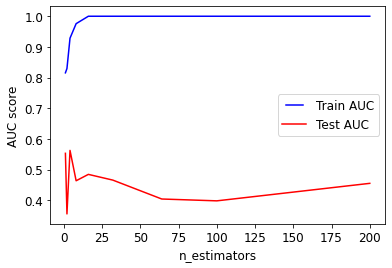

<Figure size 432x288 with 0 Axes>

In [177]:
# identify best parameters
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

print('n_estimator:',test_results.index(max(test_results)))

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()
plt.savefig("rf_exp/n_estimators_AUC.png")

n_estimator_specificity: 1


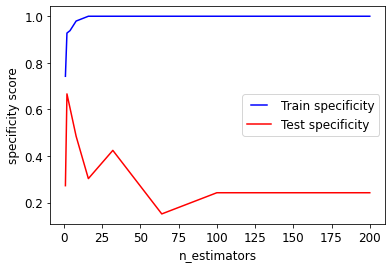

<Figure size 432x288 with 0 Axes>

In [178]:
# identify best parameters
#specificity
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   tn, fp, fn, tp = confusion_matrix(y_train, train_pred).ravel()  
   train_results.append(tn / (tn + fp))
   y_pred = rf.predict(X_test)
   tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()   
   test_results.append(tn / (tn + fp))
   
print('n_estimator_specificity:',test_results.index(max(test_results)))
line1, = plt.plot(n_estimators, train_results, 'b', label='Train specificity')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test specificity')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('specificity score')
plt.xlabel('n_estimators')
plt.show()
plt.savefig("rf_exp/n_estimators_specificity.png")

In [107]:
test_results

[0.3939393939393939,
 0.6363636363636364,
 0.5454545454545454,
 0.45454545454545453,
 0.3333333333333333,
 0.15151515151515152,
 0.21212121212121213,
 0.24242424242424243,
 0.18181818181818182]

max_depth_auc: 20


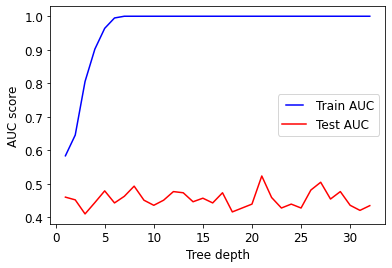

<Figure size 432x288 with 0 Axes>

In [179]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)   
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
print('max_depth_auc:',test_results.index(max(test_results)))

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()
plt.savefig("rf_exp/max_depth_AUC.png")

max_depth_specificity: 29


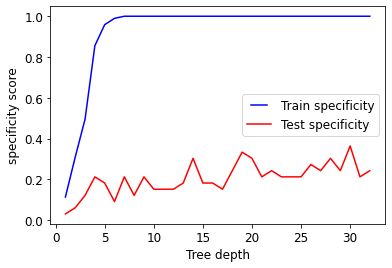

<Figure size 432x288 with 0 Axes>

In [180]:
#specificity
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)   
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   tn, fp, fn, tp = confusion_matrix(y_train, train_pred).ravel()  
   train_results.append(tn / (tn + fp))
   y_pred = rf.predict(X_test)
   tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()   
   test_results.append(tn / (tn + fp))
   
print('max_depth_specificity:',test_results.index(max(test_results)))

line1, = plt.plot(max_depths, train_results, 'b', label='Train specificity')
line2, = plt.plot(max_depths, test_results, 'r', label='Test specificity')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('specificity score')
plt.xlabel('Tree depth')
plt.show()
plt.savefig("rf_exp/max_depth_specificity.png")

min_samples_split_auc: 6


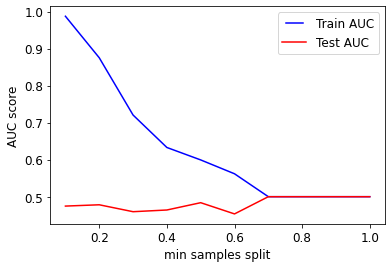

<Figure size 432x288 with 0 Axes>

In [181]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=min_samples_split)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

print('min_samples_split_auc:',test_results.index(max(test_results)))

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()
plt.savefig("rf_exp/min_samples_split_AUC.png")

min_samples_split_specificity: 1


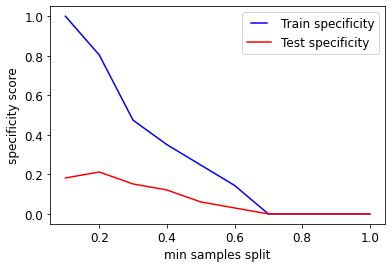

<Figure size 432x288 with 0 Axes>

In [182]:
#specificity
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=min_samples_split) 
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   tn, fp, fn, tp = confusion_matrix(y_train, train_pred).ravel()  
   train_results.append(tn / (tn + fp))
   y_pred = rf.predict(X_test)
   tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()   
   test_results.append(tn / (tn + fp))
   
print('min_samples_split_specificity:',test_results.index(max(test_results)))
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train specificity')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test specificity')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('specificity score')
plt.xlabel('min samples split')
plt.show()
plt.savefig("rf_exp/min_samples_split_specificity.png")

min_samples_leaf_auc: 3


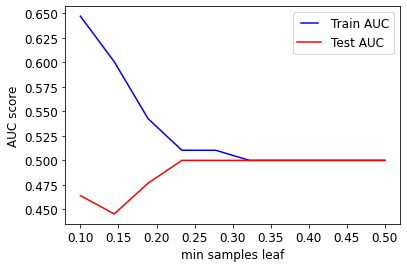

<Figure size 432x288 with 0 Axes>

In [183]:
min_samples_leafs = np.linspace(0.1, 0.5, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

print('min_samples_leaf_auc:',test_results.index(max(test_results)))    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()
plt.savefig("rf_exp/min_samples_leaf_AUC.png")

min_samples_leaf_specificity: 0


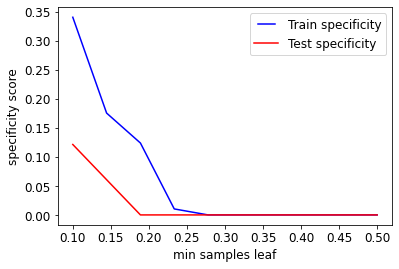

<Figure size 432x288 with 0 Axes>

In [184]:
#specificity
min_samples_leafs = np.linspace(0.1, 0.5, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf) 
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   tn, fp, fn, tp = confusion_matrix(y_train, train_pred).ravel()  
   train_results.append(tn / (tn + fp))
   y_pred = rf.predict(X_test)
   tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()   
   test_results.append(tn / (tn + fp))
   
print('min_samples_leaf_specificity:',test_results.index(max(test_results)))
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train specificity')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test specificity')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('specificity score')
plt.xlabel('min samples leaf')
plt.show()
plt.savefig("rf_exp/min_samples_leaf_specificity.png")

Elapsed time to compute the importances: 5826.095 seconds


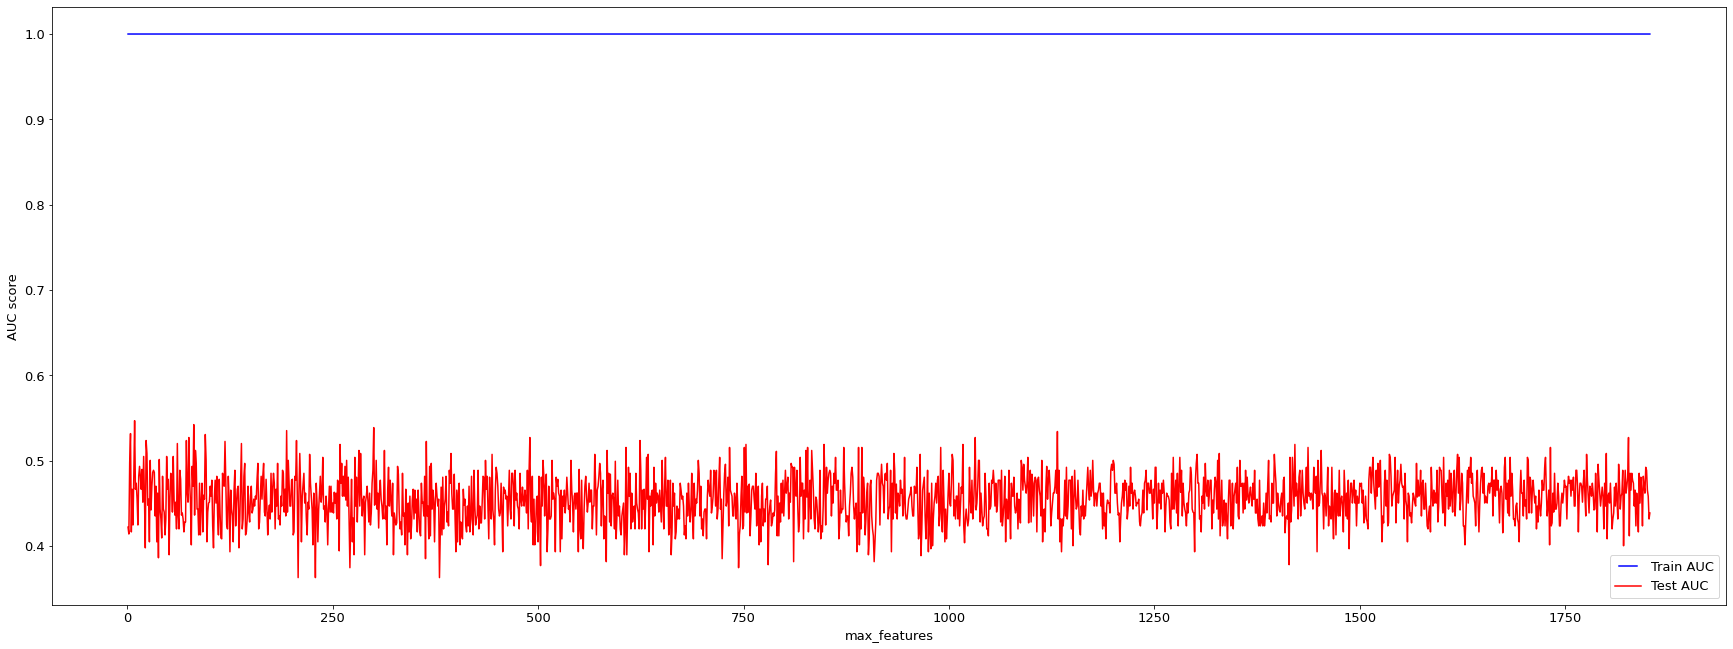

<Figure size 2160x792 with 0 Axes>

In [114]:
import time
start_time = time.time()
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []

for max_feature in max_features:
   #print(max_feature)
   rf = RandomForestClassifier(max_features=max_feature)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

from matplotlib.legend_handler import HandlerLine2D
plt.rcParams.update({"font.size": 13, "figure.figsize": [30,11]})
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_features')
plt.show()
plt.savefig("rf_exp/max_features_AUC.png")

In [115]:
max(test_results)

0.5468639887244539

In [116]:
test_results.index(max(test_results))

8

In [117]:
test_results[test_results.index(max(test_results))]

0.5468639887244539

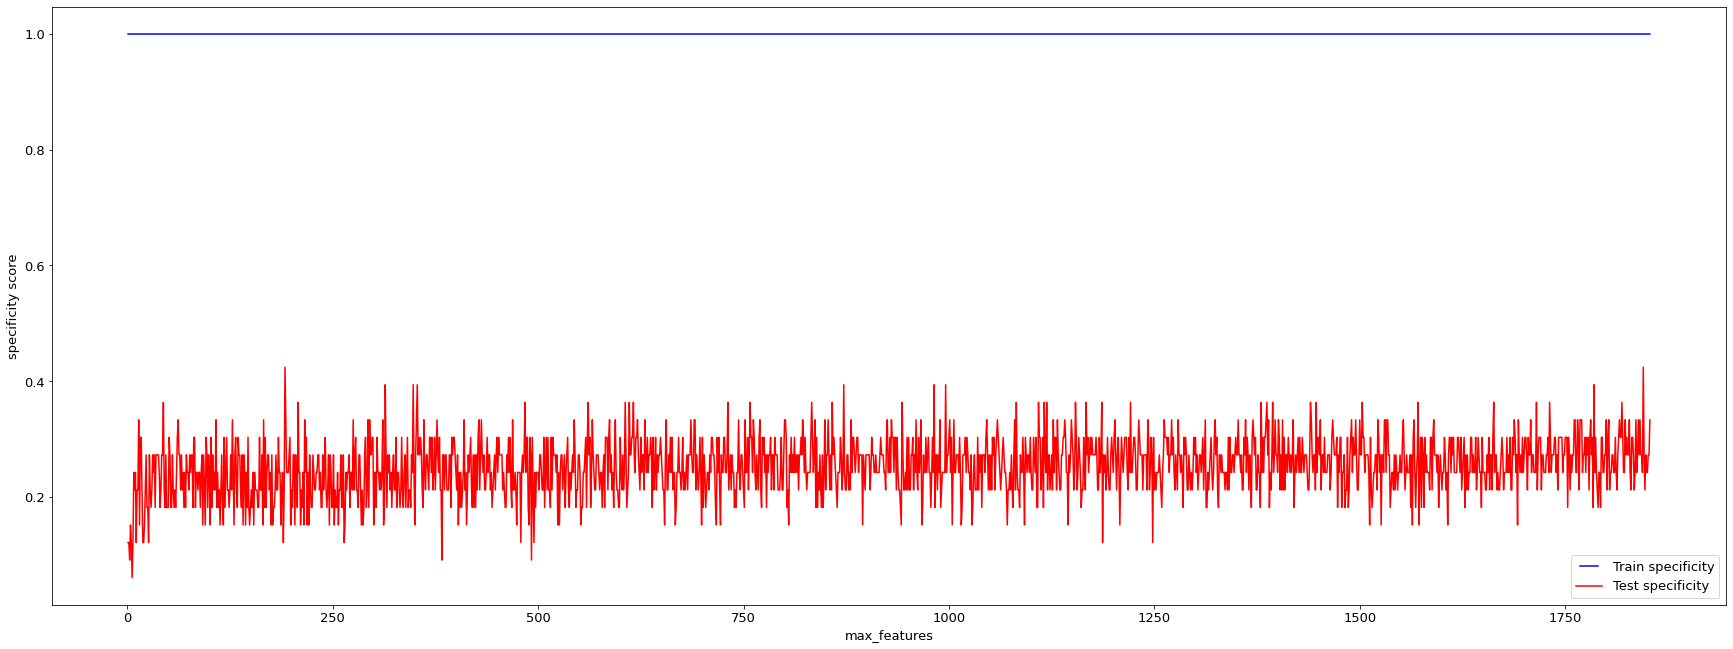

<Figure size 2160x792 with 0 Axes>

In [118]:
#specificity
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []

for max_feature in max_features:
   rf = RandomForestClassifier(max_features=max_feature)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   tn, fp, fn, tp = confusion_matrix(y_train, train_pred).ravel()  
   train_results.append(tn / (tn + fp))
   y_pred = rf.predict(X_test)
   tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()   
   test_results.append(tn / (tn + fp))
   

line1, = plt.plot(max_features, train_results, 'b', label='Train specificity')
line2, = plt.plot(max_features, test_results, 'r', label='Test specificity')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('specificity score')
plt.xlabel('max_features')
plt.show()
plt.savefig("rf_exp/max_features_specificity.png")

In [119]:
y_test.array

<PandasArray>
[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0,
 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0,
 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0,
 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0,
 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0,
 1.0]
Length: 76, dtype: float64

In [120]:
y_pred

array([1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 1.])

In [121]:
max(test_results)

0.42424242424242425

In [122]:
test_results.index(max(test_results))

191

In [123]:
test_results[test_results.index(max(test_results))]

0.42424242424242425

In [194]:
# train Random forest classifier with best parameters - accuracy

auc_clf_rf = RandomForestClassifier(max_features=191,
                               min_samples_leaf=0.10,
                               min_samples_split=0.2,
                               max_depth=20,
                               n_estimators=4
                              ) # Random Forest classifier

In [195]:
# train Random forest classifier with best parameters - specificity

spec_clf_rf = RandomForestClassifier(max_features=191,
                               min_samples_leaf=0.10,
                               min_samples_split=0.2,
                               max_depth=29,
                               n_estimators=2
                              ) # Random Forest classifier

RandomForestClassifier(max_depth=20, max_features=191, min_samples_leaf=0.1,
                       min_samples_split=0.2, n_estimators=4)
---------------


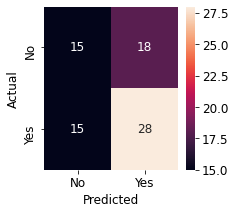

0.5323533966033966
0.6526143790849673
0.5197849462365591
0.49756158873805933

---------------
Means Cross Validation Accuracy Score :0.7192887658163586
Precision : From the Prediction of High, 56.00000000000001% values are predicted correctly
Recall : From overall High, 72.0% values are predicted correctly
AUC : 54.0%
---------------
------
True Nagatives: 15
Specificity: 0.45454545454545453
              precision    recall  f1-score   support

         Low       0.50      0.45      0.48        33
        High       0.61      0.65      0.63        43

    accuracy                           0.57        76
   macro avg       0.55      0.55      0.55        76
weighted avg       0.56      0.57      0.56        76

roc_auc: 0.5528541226215645
RandomForestClassifier(max_depth=29, max_features=191, min_samples_leaf=0.1,
                       min_samples_split=0.2, n_estimators=2)
---------------


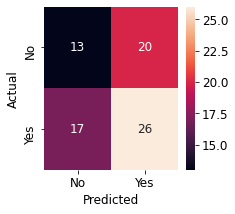

0.6074530553571034
0.65
0.5591397849462366
0.5549522373051785

---------------
Means Cross Validation Accuracy Score :0.7343715516683682
Precision : From the Prediction of High, 56.00000000000001% values are predicted correctly
Recall : From overall High, 67.0% values are predicted correctly
AUC : 46.0%
---------------
------
True Nagatives: 13
Specificity: 0.3939393939393939
              precision    recall  f1-score   support

         Low       0.43      0.39      0.41        33
        High       0.57      0.60      0.58        43

    accuracy                           0.51        76
   macro avg       0.50      0.50      0.50        76
weighted avg       0.51      0.51      0.51        76

roc_auc: 0.4992952783650458


In [196]:
clsfrs = [auc_clf_rf,spec_clf_rf]
for clf in clsfrs:
    opti_clf_rf =clf
    opti_clf_rf.fit(X_train, y_train)
    score = opti_clf_rf.score(X_test, y_test)
    
    ## Validation
    y_pred = opti_clf_rf.predict(X_test)
    
    #print(y_pred)
    y_train_pred=opti_clf_rf.predict(X_train)    
   
    
    ## Confusion Matrix 
    print(clf)
    print('---------------')
    
    fig, ax = plt.subplots(figsize=(3,3))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',xticklabels=['No','Yes'], yticklabels=['No','Yes'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    ## K Fold Validation with 10 Folds
    scores = cross_val_score(opti_clf_rf, dataset,labels_clsfier, cv=10, scoring="accuracy")
    scores=np.sqrt(scores)
    print(np.mean((cross_val_score(opti_clf_rf, dataset, labels_clsfier, cv=10, scoring="precision"))))
    print((np.mean(cross_val_score(opti_clf_rf, dataset, labels_clsfier, cv=10, scoring="recall"))))
    print(np.mean(cross_val_score(opti_clf_rf, dataset,labels_clsfier, cv=10, scoring="accuracy")))
   
    print(np.mean(cross_val_score(opti_clf_rf, dataset, labels_clsfier, cv=10, scoring="roc_auc")))
    print()
    
    print('---------------')
    print("Means Cross Validation Accuracy Score :"+str(np.mean(scores)))
    print('Precision : From the Prediction of High, '+str(round(np.mean(cross_val_score(opti_clf_rf, dataset, labels_clsfier, cv=10, scoring="precision")),2)*100)+'% values are predicted correctly')
    print('Recall : From overall High, '+str(round(np.mean(cross_val_score(opti_clf_rf, dataset, labels_clsfier, cv=10, scoring="recall")),2)*100)+'% values are predicted correctly')
    print('AUC : '+str(round(np.mean(cross_val_score(opti_clf_rf, dataset, labels_clsfier, cv=10, scoring="roc_auc")),2)*100)+'%')
    print('---------------')
    
    
    print('------')
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("True Nagatives:",tn)
    print("Specificity:",tn / (tn + fp))
    print(classification_report(y_test, y_pred, target_names=['Low','High']))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test[:77].array, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("roc_auc:",roc_auc)

In [199]:
names = [
         "Random Forest-AUC", "Random Forest-specificity"]
clsfrs = [auc_clf_rf,spec_clf_rf]
imps =[]
for name, clf in zip(names, clsfrs):
    importances = clf.feature_importances_
    std = np.std([
        tree.feature_importances_ for tree in clf.estimators_], axis=0)


    feats = {} # a dict to hold feature_name: feature_importance
    for feature, importance in zip(dataset.columns, clf.feature_importances_):
        feats[feature] = importance #add the name/value pair 

    importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
    importances = importances.sort_values(by='Gini-importance',ascending=False)
    importances.to_csv('rf_exp/'+name+'.csv')
    imps.append(importances)

In [201]:
for importances in imps:
    print(importances.head(100))

              Gini-importance
⏰                    0.162308
upvote_ratio         0.091854
🩸                    0.091514
💧                    0.085092
Loss                 0.074437
...                       ...
📕                    0.000000
↪                    0.000000
📑                    0.000000
🈚                    0.000000
🏯                    0.000000

[100 rows x 1 columns]
      Gini-importance
DD           0.294175
moon         0.205619
🔪            0.183360
🖨            0.093092
💩            0.090596
...               ...
🕶            0.000000
💈            0.000000
🟡            0.000000
♊            0.000000
⛴            0.000000

[100 rows x 1 columns]


In [202]:
imps_nonzero =[]
for importances in imps:
    importances_imp =  importances[importances['Gini-importance'] > 0] 
    importances_imp.sort_values(by=['Gini-importance'],ascending=False)
    imps_nonzero.append(importances_imp)
    print(importances_imp)
    

              Gini-importance
⏰                    0.162308
upvote_ratio         0.091854
🩸                    0.091514
💧                    0.085092
Loss                 0.074437
🤮                    0.071872
🤣                    0.066429
🚂                    0.061278
🥭                    0.058016
NFLX                 0.050453
CAT                  0.048953
C                    0.042413
ABC                  0.041604
🗿                    0.030494
d                    0.023283
      Gini-importance
DD           0.294175
moon         0.205619
🔪            0.183360
🖨            0.093092
💩            0.090596
🐼            0.068675
IBM          0.042346
X            0.022138


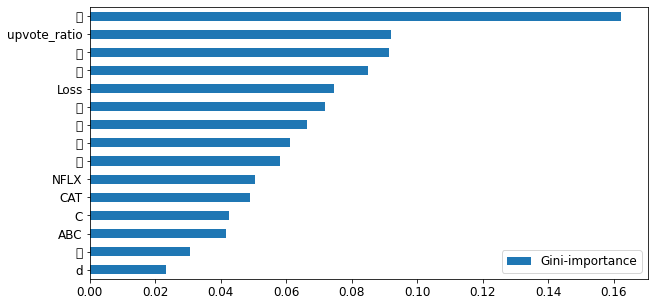

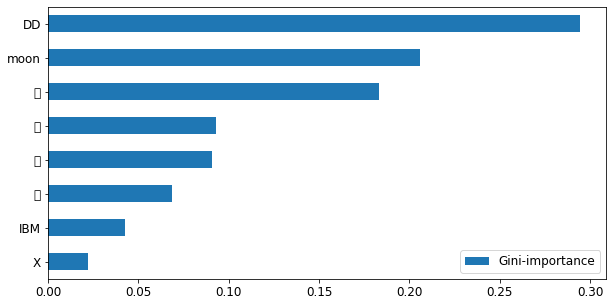

In [204]:
plt.rcParams.update({"font.size": 12, "figure.figsize": [10,5]})
names = [
         "Random Forest-AUC-gini", "Random Forest-specificity-gini"]
for name,imp in zip(names,imps_nonzero):
    imp.sort_values(by='Gini-importance').plot(kind='barh')
    plt.savefig("rf_exp/"+name+".png")

In [110]:
X_train, X_test, y_train, y_test = train_test_split(dataset, labels_reg_norm, test_size=0.25, random_state = 4)


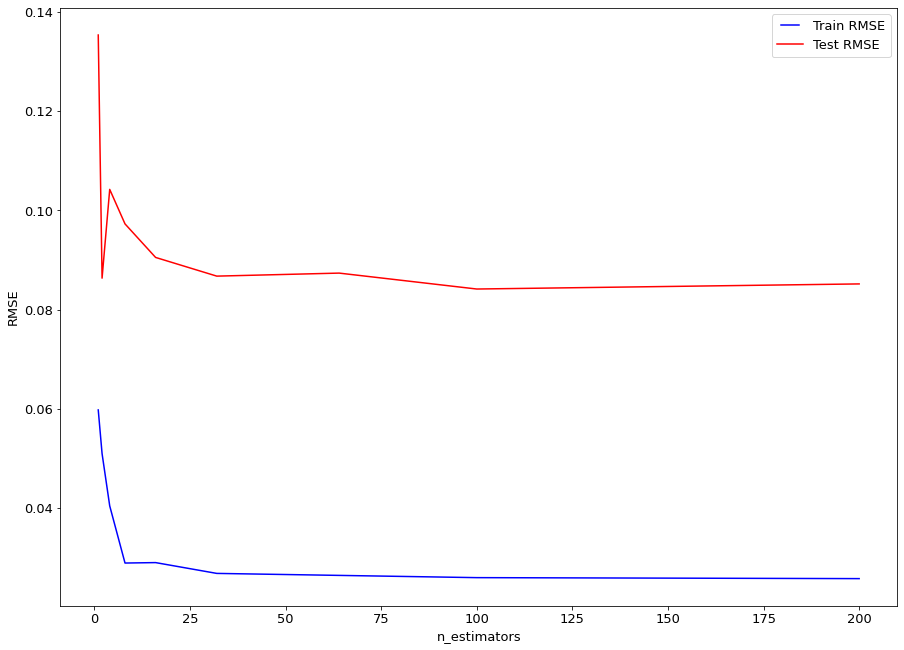

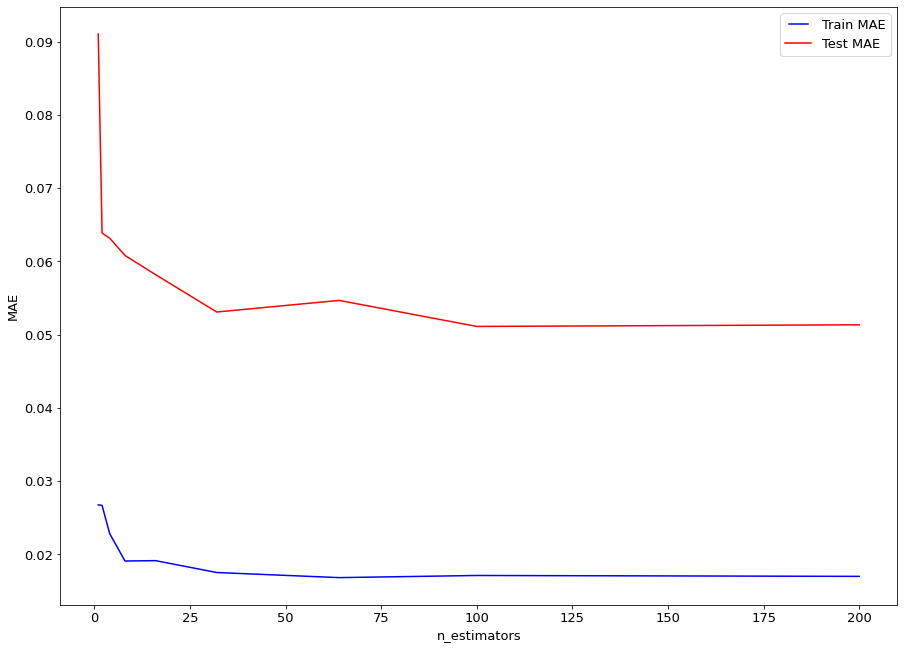

In [113]:
# parameter selection for regression
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_RMSE = []
test_RMSE = []

train_MAE = []
test_MAE = []

for estimator in n_estimators:
   rf = RandomForestRegressor(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   rmse = sqrt(mean_squared_error(y_train, train_pred))   
   train_RMSE.append(rmse)
   train_MAE.append(mean_absolute_error(y_train, train_pred))
   y_pred = rf.predict(X_test)
   rmse = sqrt(mean_squared_error(y_test, y_pred))   
   test_RMSE.append(rmse)
   test_MAE.append(mean_absolute_error(y_test, y_pred))

plt.rcParams.update({"font.size": 13, "figure.figsize": [15,11]})
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_RMSE, 'b', label='Train RMSE')
line2, = plt.plot(n_estimators, test_RMSE, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
plt.xlabel('n_estimators')
plt.show()

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_MAE, 'b', label='Train MAE')
line2, = plt.plot(n_estimators, test_MAE, 'r', label='Test MAE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MAE')
plt.xlabel('n_estimators')
plt.show()

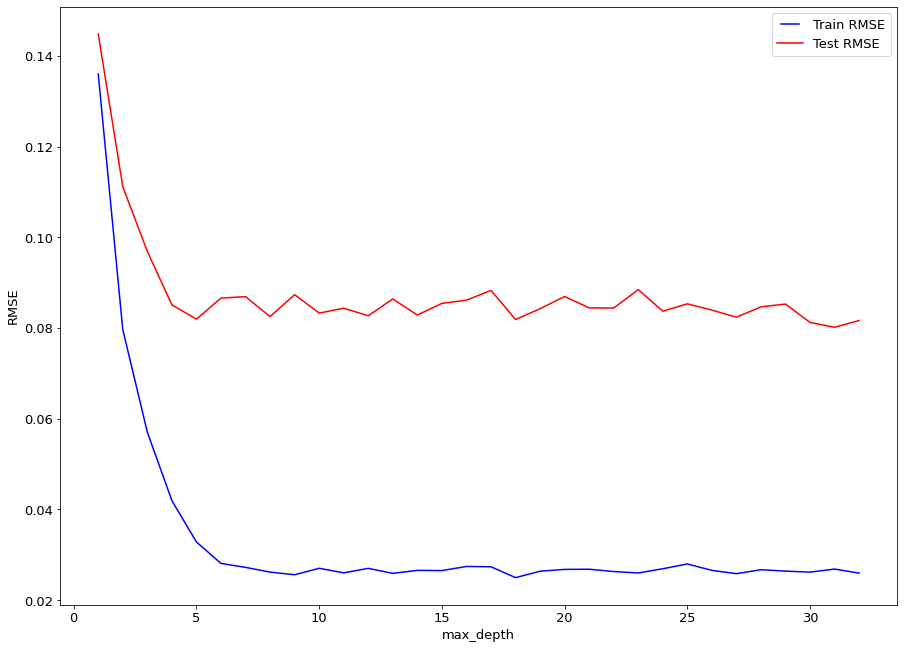

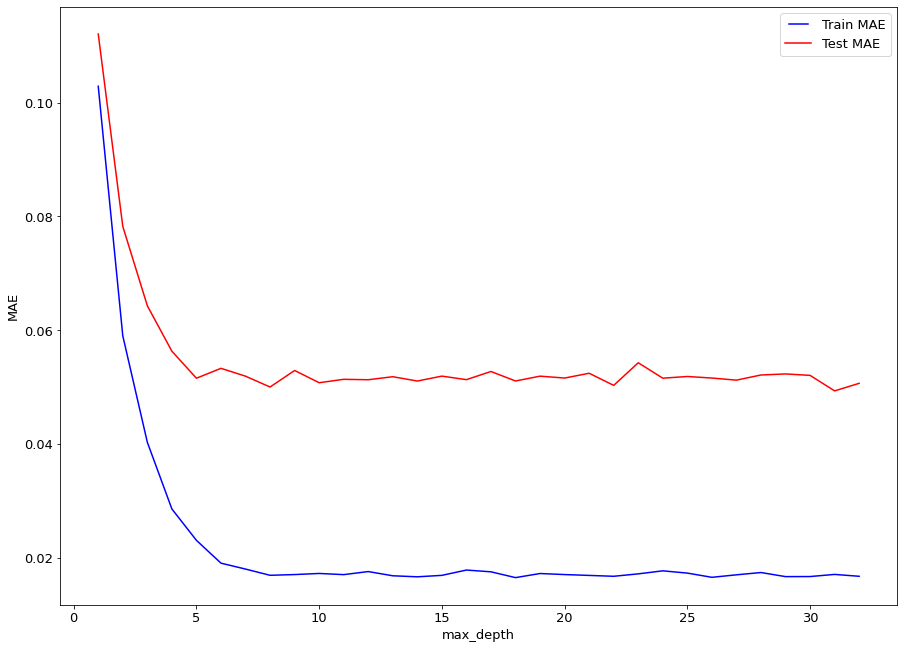

In [115]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_RMSE = []
test_RMSE = []

train_MAE = []
test_MAE = []

for max_depth in max_depths:
   rf = RandomForestRegressor(max_depth=max_depth, n_jobs=-1) 
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   rmse = sqrt(mean_squared_error(y_train, train_pred))   
   train_RMSE.append(rmse)
   train_MAE.append(mean_absolute_error(y_train, train_pred))
   y_pred = rf.predict(X_test)
   rmse = sqrt(mean_squared_error(y_test, y_pred))   
   test_RMSE.append(rmse)
   test_MAE.append(mean_absolute_error(y_test, y_pred))

plt.rcParams.update({"font.size": 13, "figure.figsize": [15,11]})
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_RMSE, 'b', label='Train RMSE')
line2, = plt.plot(max_depths, test_RMSE, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
plt.xlabel('max_depth')
plt.show()

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_MAE, 'b', label='Train MAE')
line2, = plt.plot(max_depths, test_MAE, 'r', label='Test MAE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MAE')
plt.xlabel('max_depth')
plt.show()

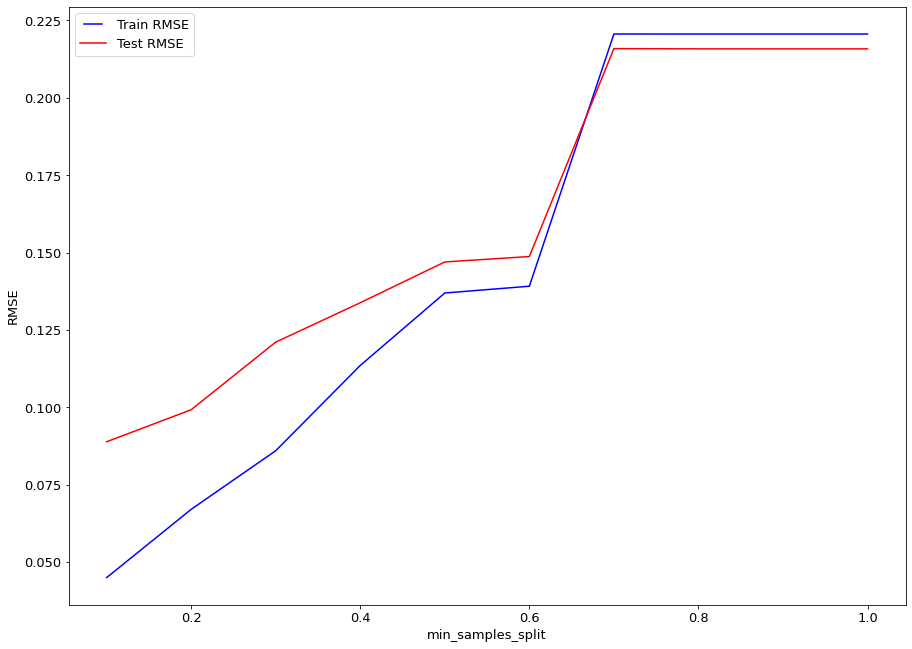

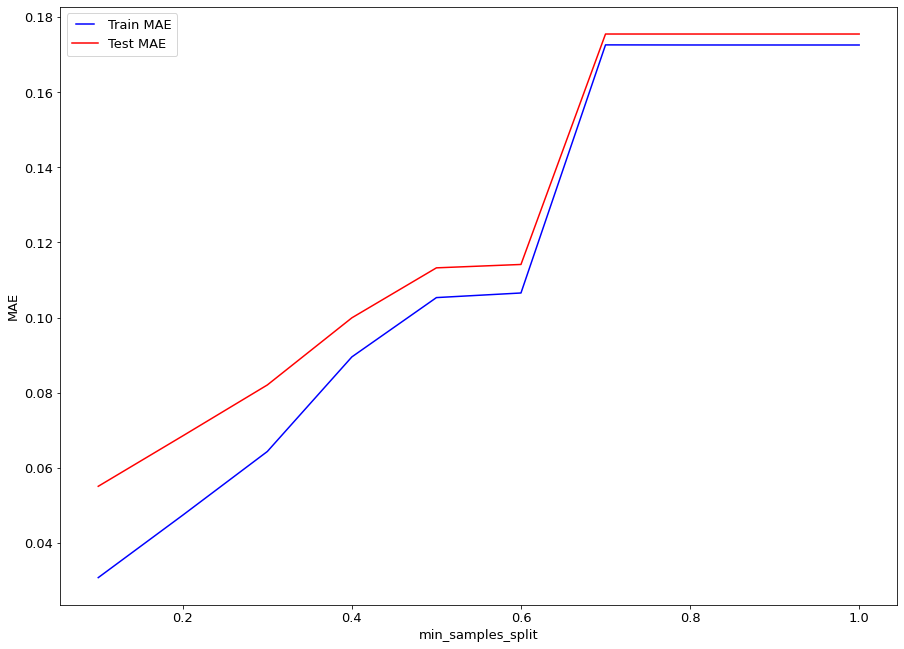

In [116]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_RMSE = []
test_RMSE = []

train_MAE = []
test_MAE = []

for min_samples_split in min_samples_splits:
   rf = RandomForestRegressor(min_samples_split=min_samples_split) 
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   rmse = sqrt(mean_squared_error(y_train, train_pred))   
   train_RMSE.append(rmse)
   train_MAE.append(mean_absolute_error(y_train, train_pred))
   y_pred = rf.predict(X_test)
   rmse = sqrt(mean_squared_error(y_test, y_pred))   
   test_RMSE.append(rmse)
   test_MAE.append(mean_absolute_error(y_test, y_pred))

plt.rcParams.update({"font.size": 13, "figure.figsize": [15,11]})
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_RMSE, 'b', label='Train RMSE')
line2, = plt.plot(min_samples_splits, test_RMSE, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
plt.xlabel('min_samples_split')
plt.show()

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_MAE, 'b', label='Train MAE')
line2, = plt.plot(min_samples_splits, test_MAE, 'r', label='Test MAE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MAE')
plt.xlabel('min_samples_split')
plt.show()

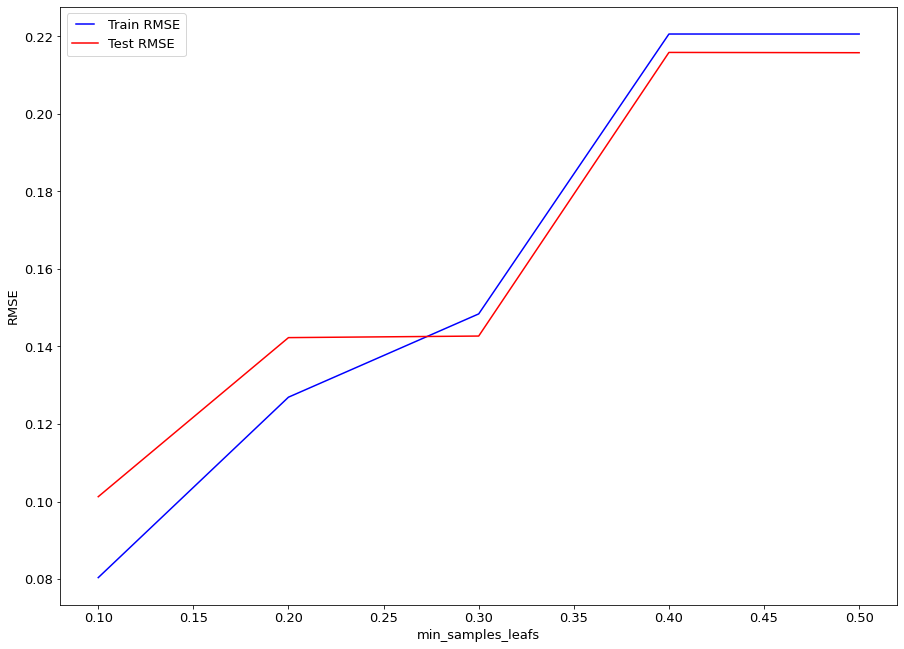

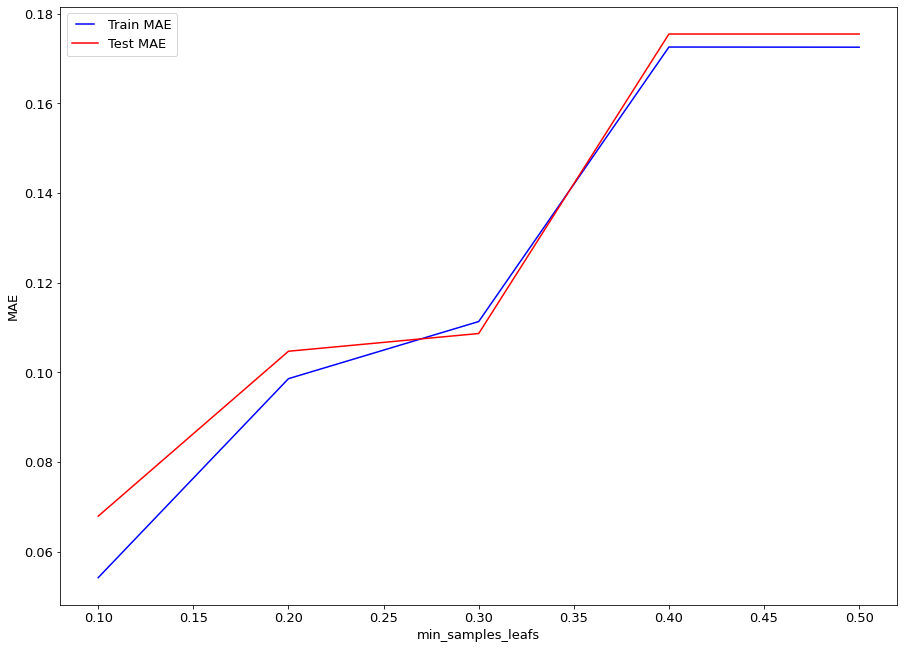

In [117]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_RMSE = []
test_RMSE = []

train_MAE = []
test_MAE = []

for min_samples_leaf in min_samples_leafs:
   rf = RandomForestRegressor(min_samples_leaf=min_samples_leaf) 
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   rmse = sqrt(mean_squared_error(y_train, train_pred))   
   train_RMSE.append(rmse)
   train_MAE.append(mean_absolute_error(y_train, train_pred))
   y_pred = rf.predict(X_test)
   rmse = sqrt(mean_squared_error(y_test, y_pred))   
   test_RMSE.append(rmse)
   test_MAE.append(mean_absolute_error(y_test, y_pred))

plt.rcParams.update({"font.size": 13, "figure.figsize": [15,11]})
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_RMSE, 'b', label='Train RMSE')
line2, = plt.plot(min_samples_leafs, test_RMSE, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
plt.xlabel('min_samples_leafs')
plt.show()

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_MAE, 'b', label='Train MAE')
line2, = plt.plot(min_samples_leafs, test_MAE, 'r', label='Test MAE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MAE')
plt.xlabel('min_samples_leafs')
plt.show()

Elapsed time to compute the importances: 5172.263 seconds


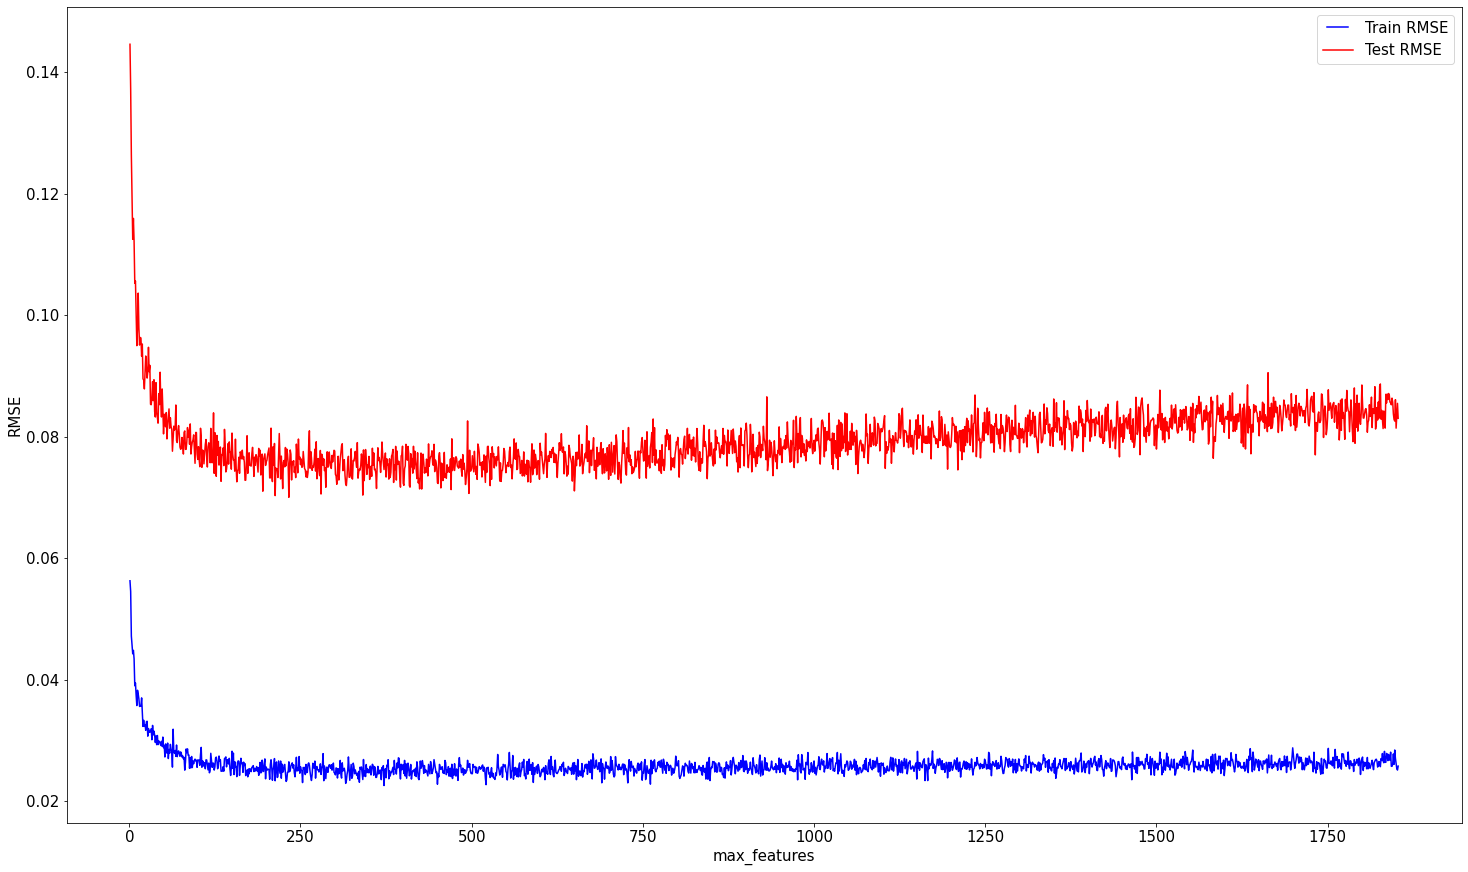

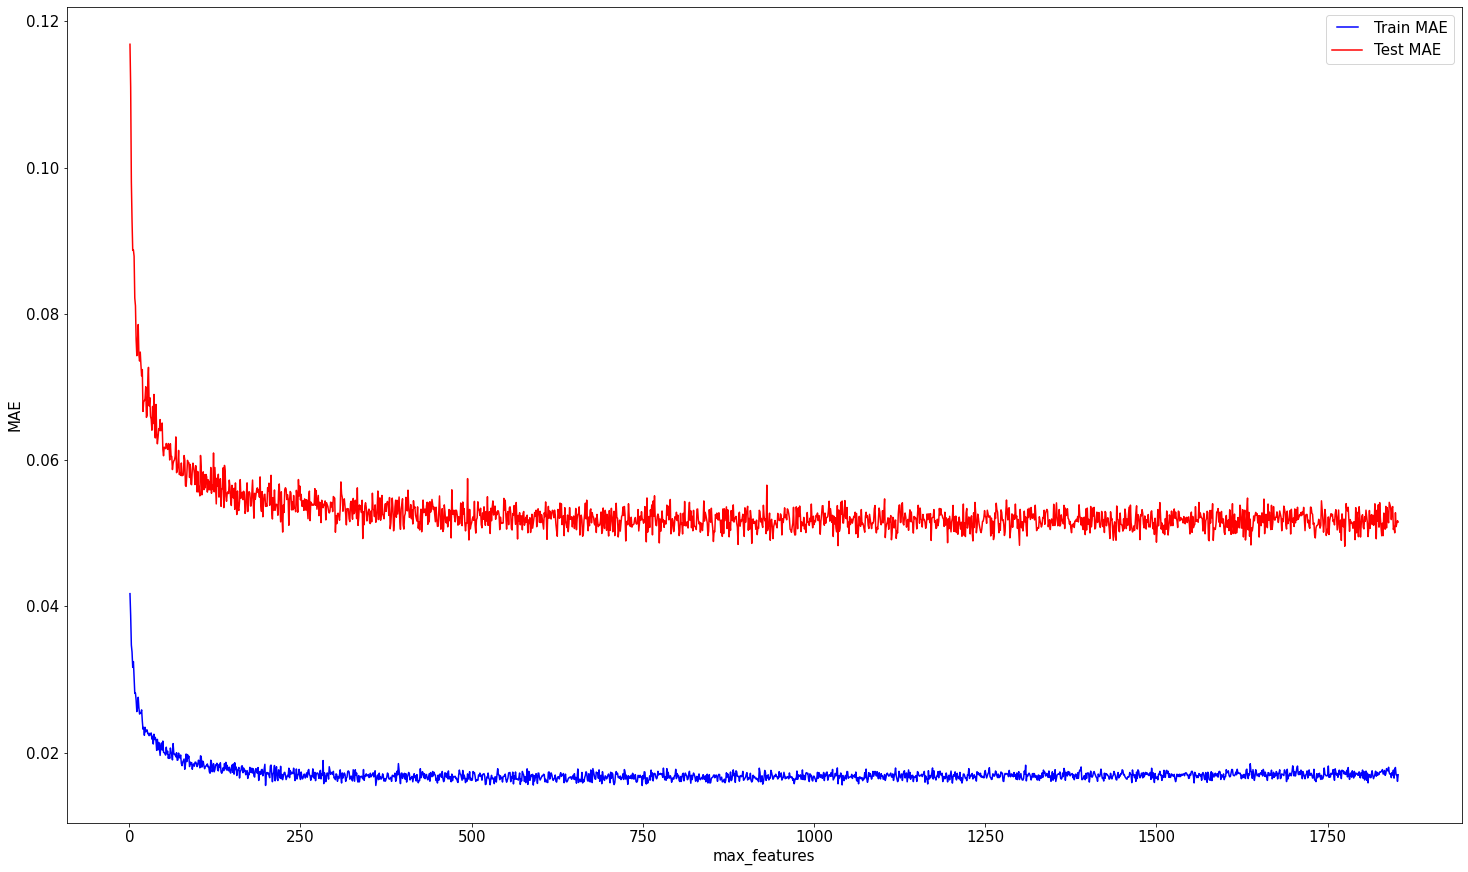

In [118]:
import time
start_time = time.time()
max_features = list(range(1,X_train.shape[1]))
train_RMSE = []
test_RMSE = []

train_MAE = []
test_MAE = []

for max_feature in max_features:
   rf = RandomForestRegressor(max_features=max_feature) 
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   rmse = sqrt(mean_squared_error(y_train, train_pred))   
   train_RMSE.append(rmse)
   train_MAE.append(mean_absolute_error(y_train, train_pred))
   y_pred = rf.predict(X_test)
   rmse = sqrt(mean_squared_error(y_test, y_pred))   
   test_RMSE.append(rmse)
   test_MAE.append(mean_absolute_error(y_test, y_pred))
    
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

plt.rcParams.update({"font.size": 15, "figure.figsize": [25,15]})
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_RMSE, 'b', label='Train RMSE')
line2, = plt.plot(max_features, test_RMSE, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
plt.xlabel('max_features')
plt.show()

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_MAE, 'b', label='Train MAE')
line2, = plt.plot(max_features, test_MAE, 'r', label='Test MAE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MAE')
plt.xlabel('max_features')
plt.show()

In [120]:
print(min(test_RMSE))
print(test_RMSE.index(min(test_RMSE)))
print(test_RMSE[test_RMSE.index(min(test_RMSE))])

0.07001912936031288
232
0.07001912936031288


In [119]:
print(min(test_MAE))
print(test_MAE.index(min(test_MAE)))
print(test_MAE[test_MAE.index(min(test_MAE))])

0.04822579880771879
1774
0.04822579880771879


In [121]:
from  matplotlib import pyplot
from matplotlib.pyplot import figure
def calculate_errors(predictions,method):
    ## get originl area from the transformed one.
   
    # RootMeanSquared Error Calculation 
    print("\n\nFor "+method)
    meanSquaredError_nb_one = mean_squared_error(y_test, predictions)
  
    rootMeanSquaredError_nb_one = sqrt(meanSquaredError_nb_one)
    print("RMSE:", rootMeanSquaredError_nb_one)

    # MeanAbsolute Error Calculation 
    absolute_error_nb_one = mean_absolute_error(y_test, predictions)
    print("Absolute error is:", absolute_error_nb_one)   
   
    
    #print("R2 error is:",r2_score(y_test_orig, predictions_inverse))
    
    #print(predictions)
    #print(y_test)
   
    fig = figure(figsize=(19, 13))
    pyplot.plot(predictions, label='Predicated Price (Normalized)')#, fontsize=18)
    pyplot.plot(y_test, label='Actual Price (Normalized)')#, fontsize=18)
    pyplot.xlabel('Date', fontsize=18)
    pyplot.ylabel('Price', fontsize=18)
    pyplot.xticks(fontsize=13, rotation=90)
    pyplot.legend( prop={'size':16})
    pyplot.show()
    fig.savefig('rf_exp/'+method +'.png')


In [122]:


# Importing all the required Regressors used in the paper
#clf_dt = DecisionTreeRegressor() # Decision Tree Regressor
clf_rf = RandomForestRegressor(max_features=test_RMSE[test_RMSE.index(min(test_RMSE))],
                               min_samples_leaf=0.10,
                               min_samples_split=0.1,
                               max_depth=8,
                               n_estimators=30
                              ) # Random Forest Regressor




For Random Forest
RMSE: 0.10493087333909608
Absolute error is: 0.07986274536075125


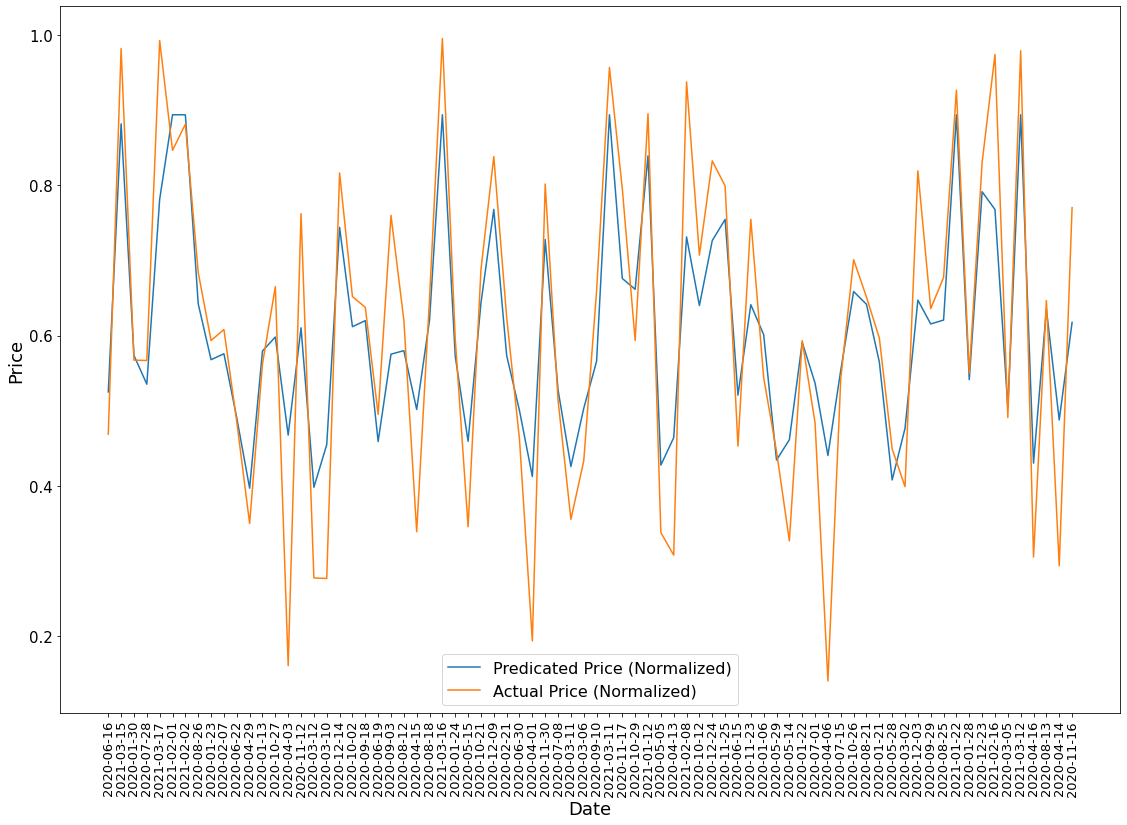

In [123]:

# Random Forest Regressor

# Training using Random Forest Regressor
clf_rf.fit(X_train, y_train)
# Testing using Random Forest Regressor
predictions_rf_one = clf_rf.predict(X_test)

calculate_errors(predictions_rf_one,"Random Forest")


In [217]:

importances = clf_rf.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)

In [218]:
plt.rcParams.update({"font.size": 13, "figure.figsize": [50,50]})
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(dataset.columns, clf_rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance',ascending=False)

In [219]:
std =std.sort()

In [220]:
plt.rcParams.update({"font.size": 20, "figure.figsize": [390,30]})
fig, ax = plt.subplots()
importances.sort_values(by='Gini-importance').plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [160]:
importances_imp =  importances[importances['Gini-importance'] > 0] 

In [161]:
importances_imp.sort_values(by=['Gini-importance'],ascending=False)

Gini-importance
🌚                     0.093231
GME                   0.091067
📈                     0.075808
Stocks                0.065059
moon                  0.061780
...                        ...
R                     0.000755
NOV                   0.000661
GILD                  0.000631
comment_count         0.000575
SE                    0.000051

[70 rows x 1 columns]

In [ ]:
importances_imp.sort_values(by=['Gini-importance'],ascending=False).head(70)

<AxesSubplot:>

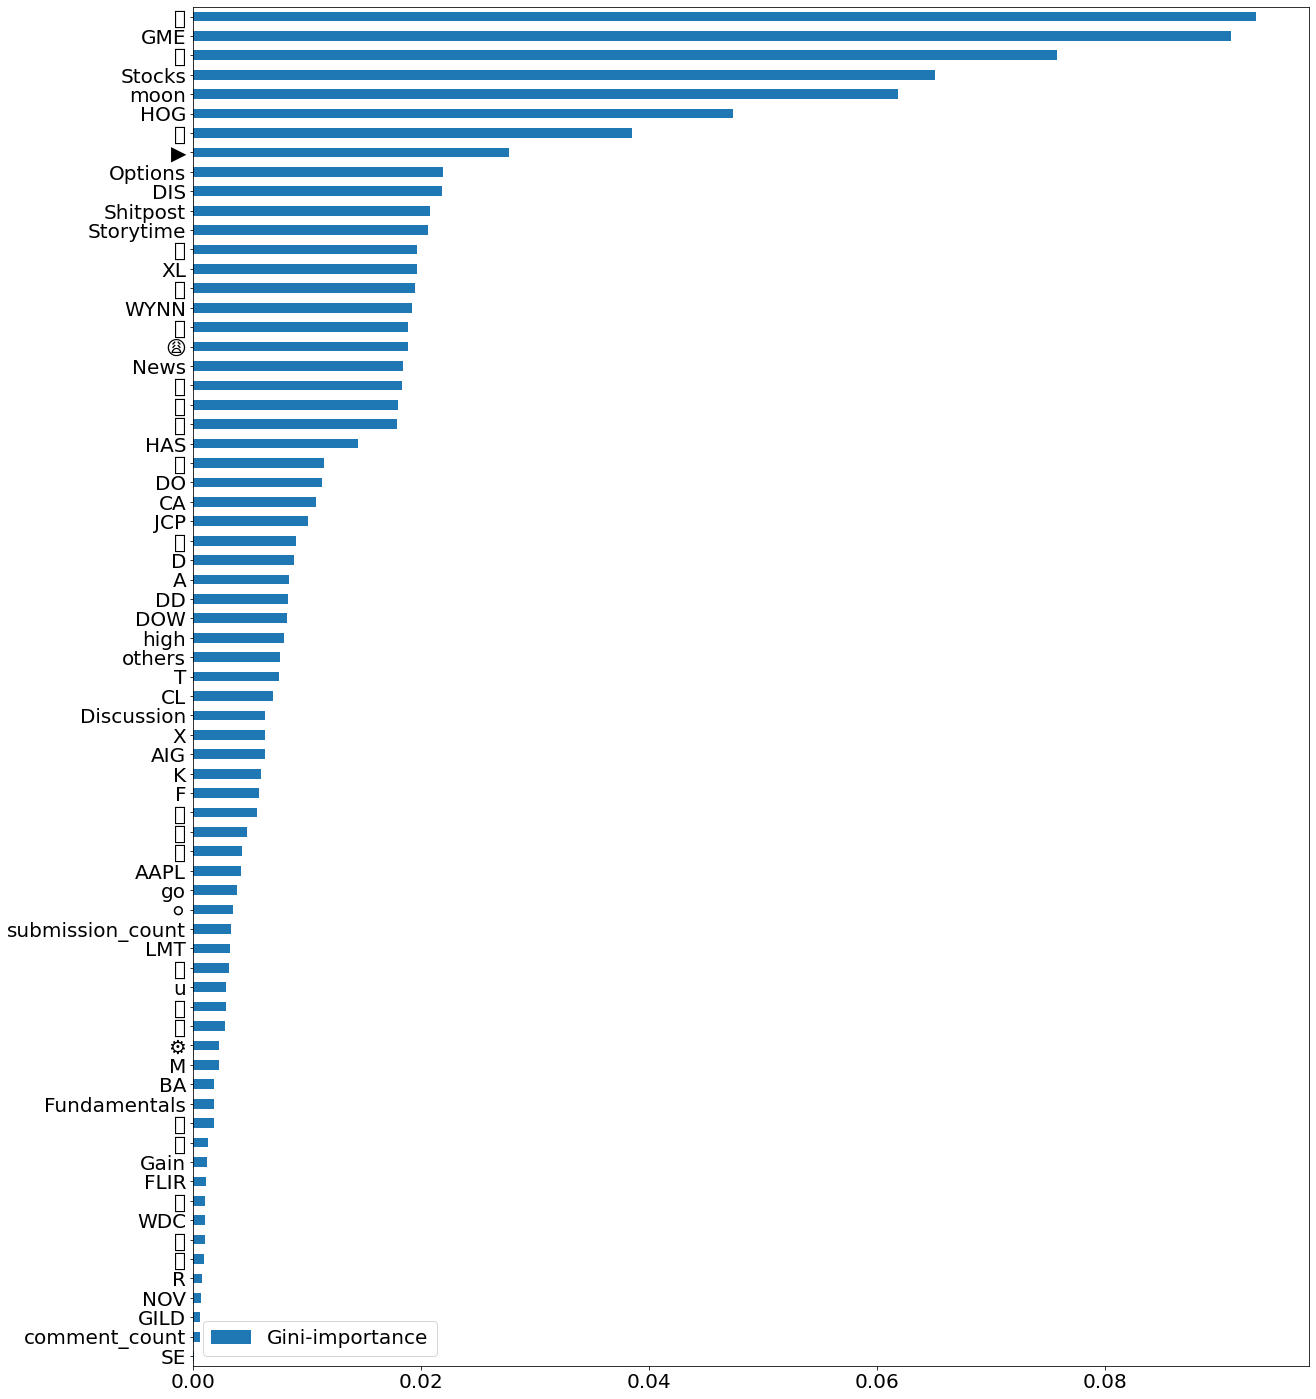

In [162]:
plt.rcParams.update({"font.size": 20, "figure.figsize": [20,25]})
importances_imp.sort_values(by='Gini-importance').plot(kind='barh')

In [164]:
from mlxtend.feature_selection import SequentialFeatureSelector  ## Sequential  Selection
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt


In [165]:
importances_imp.index.tolist()

['submission_count',
 'comment_count',
 'u',
 '🥭',
 '🤡',
 '🤭',
 '🌛',
 '👀',
 '🍏',
 '🚀',
 '😩',
 '📈',
 '👋',
 '👄',
 '⚪',
 '▶',
 '⚙',
 '🍎',
 '🇲',
 '🌚',
 '🅰',
 '🌖',
 '👁',
 '🛸',
 '\U0001fa90',
 '🌽',
 '🌘',
 '🦀',
 '📄',
 'Discussion',
 'Shitpost',
 'Stocks',
 'Options',
 'DD',
 'Fundamentals',
 'Storytime',
 'others',
 'Gain',
 'News',
 'GME',
 'AAPL',
 'A',
 'K',
 'BA',
 'LMT',
 'CA',
 'HAS',
 'F',
 'R',
 'DIS',
 'D',
 'DO',
 'M',
 'T',
 'X',
 'SE',
 'DOW',
 'CL',
 'JCP',
 'WYNN',
 'FLIR',
 'WDC',
 'XL',
 'NOV',
 'GILD',
 'HOG',
 'AIG',
 'moon',
 'go',
 'high']

In [166]:
# choose only top 70 features from above
dataset_70 = dataset[dataset.columns.intersection(importances_imp.index.tolist())]


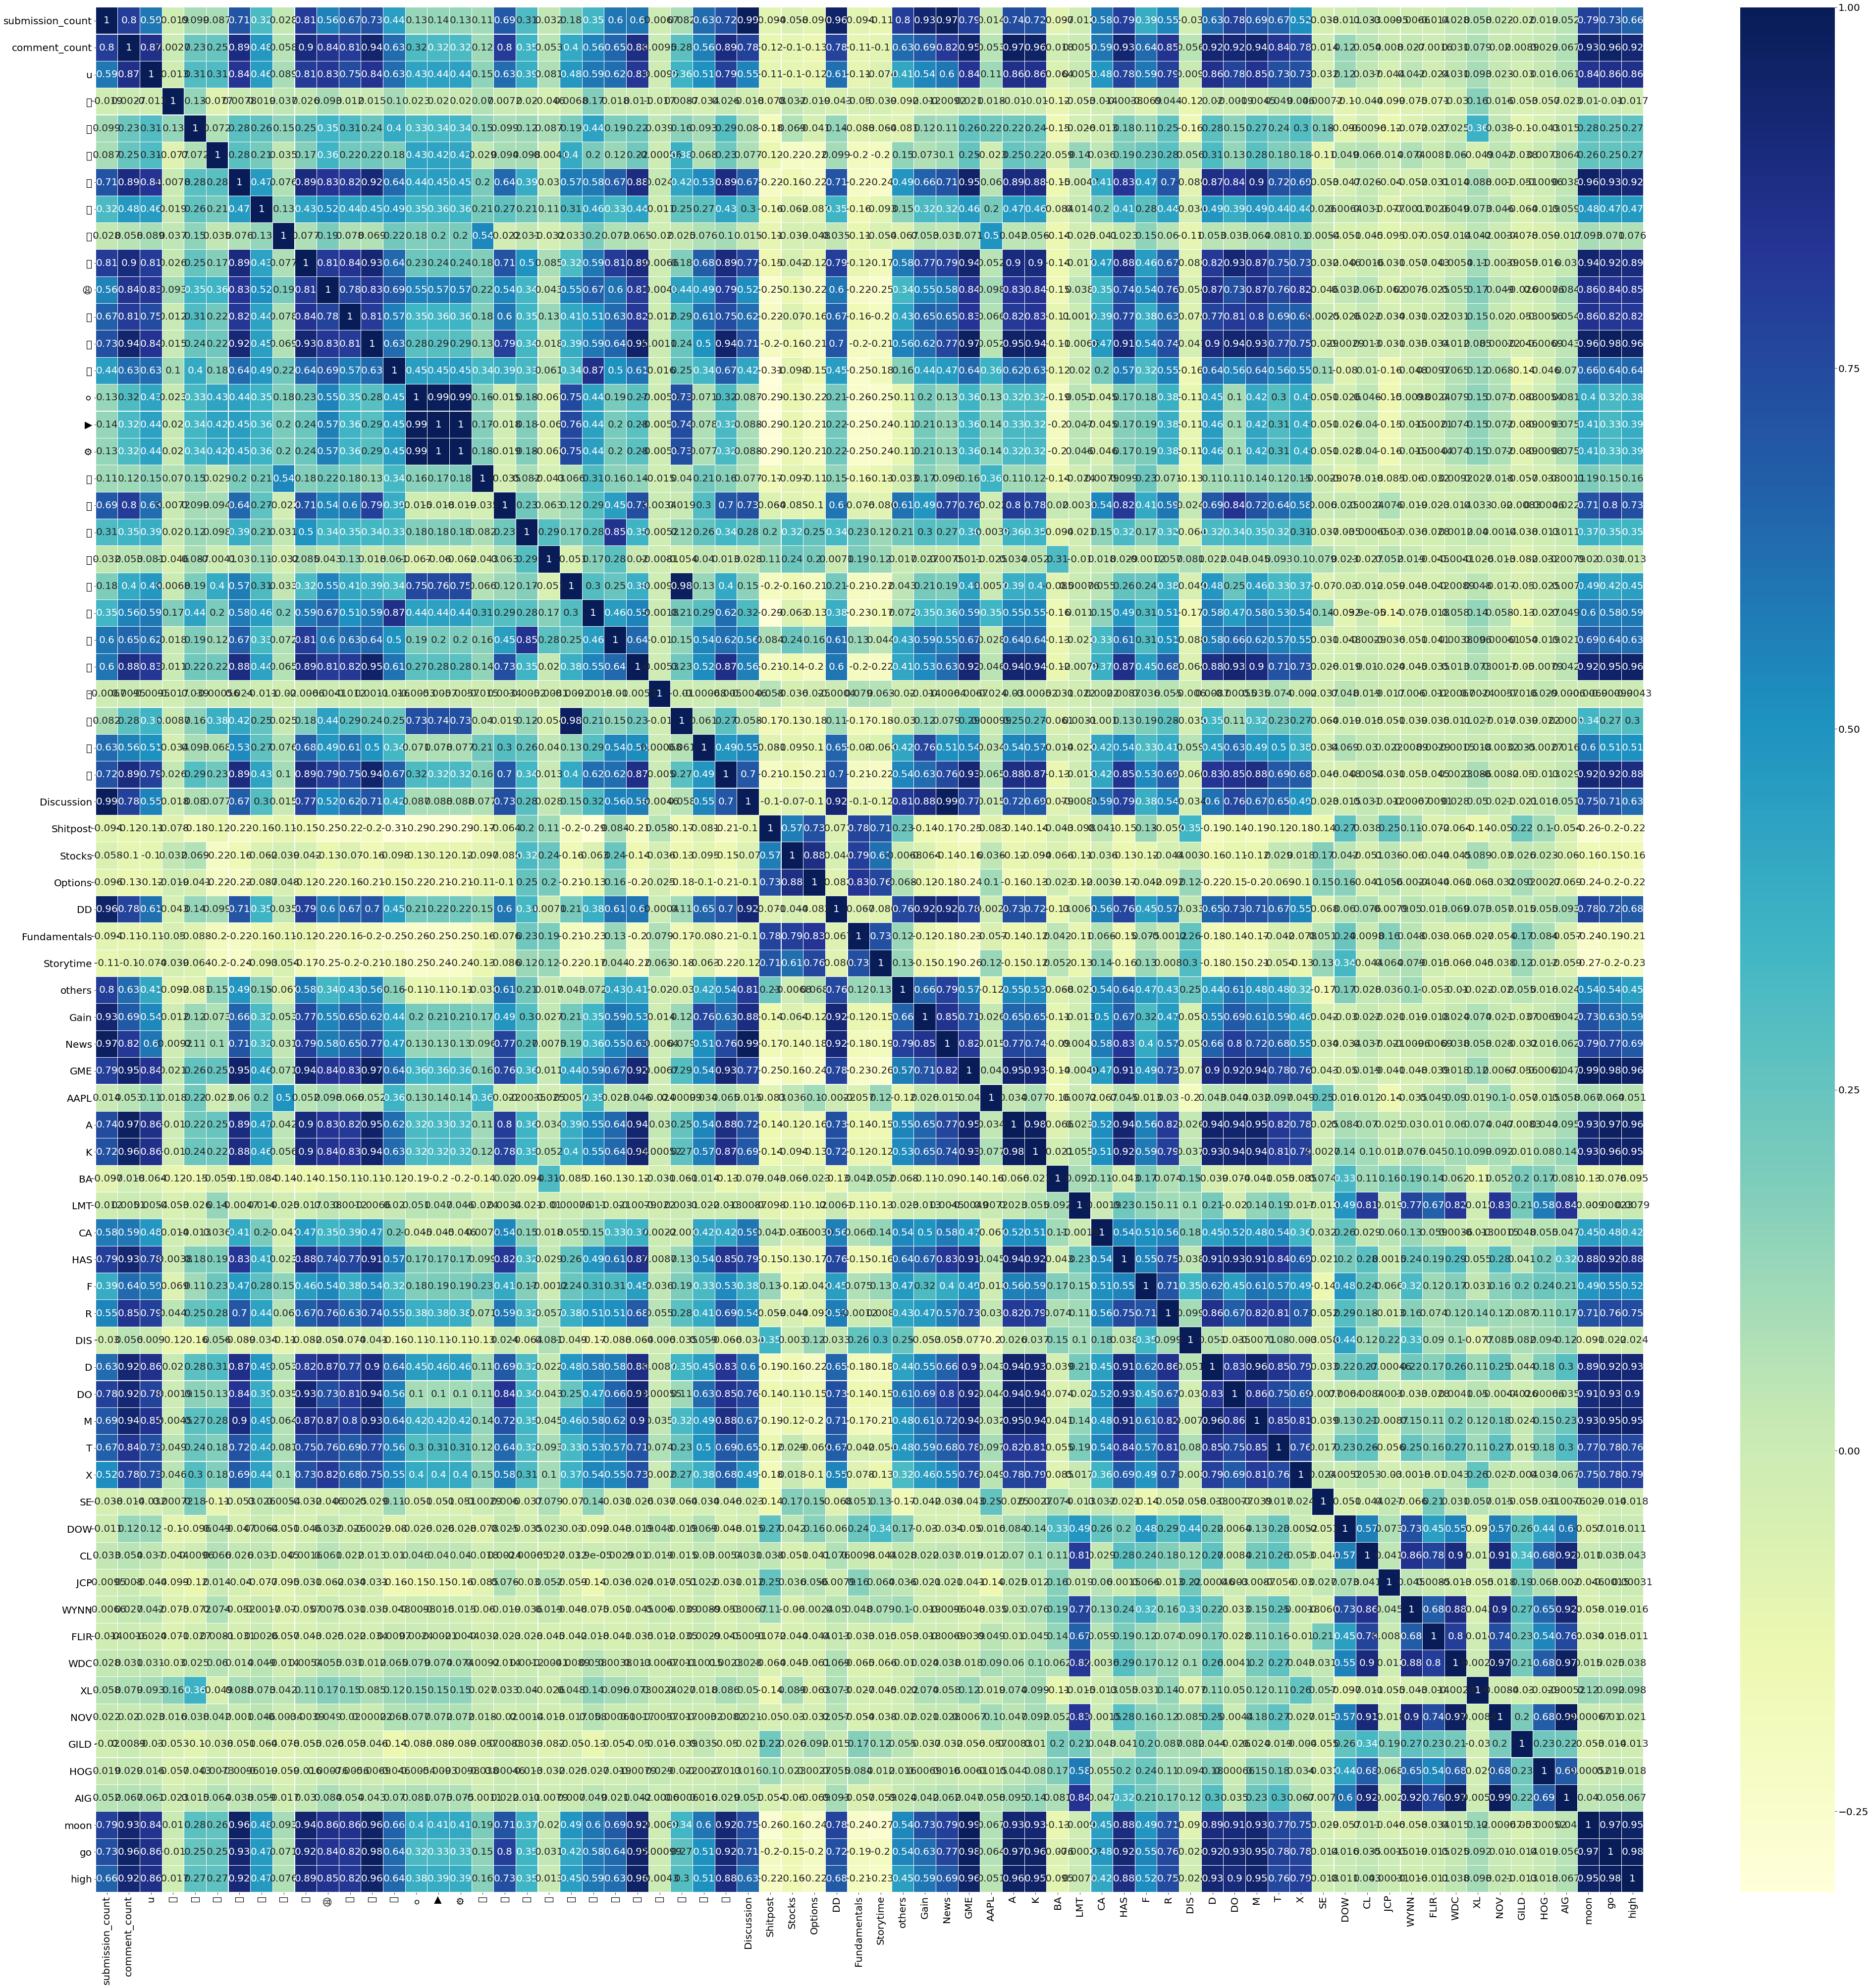

In [181]:
###Remove some of the highly correlated independent variables. (if multicollinearity problem)
plt.rcParams.update({"font.size": 20})
np.set_printoptions(precision=3)
cm = np.corrcoef(dataset_70.values.T) 
f, ax = plt.subplots(figsize =(70, 70)) #figsize =(100, 100)
heatmap = sns.heatmap(cm, ax = ax, cmap ="YlGnBu",annot=True,linewidths = 0.1,yticklabels = dataset_70.columns,xticklabels = dataset_70.columns) 
fig = heatmap.get_figure()
fig.savefig("rf_exp/heatmap_normalized.png")

In [185]:
# remove corelated features
colinear_features = ['go','high','GME','D','M','T','HAS','Discussion','DD','News']
features_without_colinearity= importances_imp.index.tolist()
for ele in colinear_features:
    features_without_colinearity.remove(ele)

dataset_70 = dataset[dataset.columns.intersection(features_without_colinearity)]

In [186]:
features_without_colinearity

['submission_count',
 'comment_count',
 'u',
 '🥭',
 '🤡',
 '🤭',
 '🌛',
 '👀',
 '🍏',
 '🚀',
 '😩',
 '📈',
 '👋',
 '👄',
 '⚪',
 '▶',
 '⚙',
 '🍎',
 '🇲',
 '🌚',
 '🅰',
 '🌖',
 '👁',
 '🛸',
 '\U0001fa90',
 '🌽',
 '🌘',
 '🦀',
 '📄',
 'Shitpost',
 'Stocks',
 'Options',
 'Fundamentals',
 'Storytime',
 'others',
 'Gain',
 'AAPL',
 'A',
 'K',
 'BA',
 'LMT',
 'CA',
 'F',
 'R',
 'DIS',
 'DO',
 'X',
 'SE',
 'DOW',
 'CL',
 'JCP',
 'WYNN',
 'FLIR',
 'WDC',
 'XL',
 'NOV',
 'GILD',
 'HOG',
 'AIG',
 'moon']

In [187]:
X_train, X_test, y_train, y_test = train_test_split(dataset_70, labels_reg_norm, test_size=0.25, random_state = 4)


In [188]:
dataset_70.columns

Index(['submission_count', 'comment_count', 'u', '🥭', '🤡', '🤭', '🌛', '👀', '🍏',
       '🚀', '😩', '📈', '👋', '👄', '⚪', '▶', '⚙', '🍎', '🇲', '🌚', '🅰', '🌖', '👁',
       '🛸', '🪐', '🌽', '🌘', '🦀', '📄', 'Shitpost', 'Stocks', 'Options',
       'Fundamentals', 'Storytime', 'others', 'Gain', 'AAPL', 'A', 'K', 'BA',
       'LMT', 'CA', 'F', 'R', 'DIS', 'DO', 'X', 'SE', 'DOW', 'CL', 'JCP',
       'WYNN', 'FLIR', 'WDC', 'XL', 'NOV', 'GILD', 'HOG', 'AIG', 'moon'],
      dtype='object')

In [189]:
rf= RandomForestRegressor(
                               min_samples_leaf=0.10,
                               min_samples_split=0.1,
                               max_depth=8,
                               n_estimators=30
                              ) # Random Forest Regressor
sfs_rf = SequentialFeatureSelector(rf, k_features=30, 
          forward=True, 
          floating=False, 
          scoring='neg_root_mean_squared_error',
          #scoring='neg_mean_squared_error',
          cv=10)
sfs_rf.fit(X_train, y_train)


SequentialFeatureSelector(cv=10,
                          estimator=RandomForestRegressor(max_depth=8,
                                                          min_samples_leaf=0.1,
                                                          min_samples_split=0.1,
                                                          n_estimators=30),
                          k_features=30, scoring='neg_root_mean_squared_error')

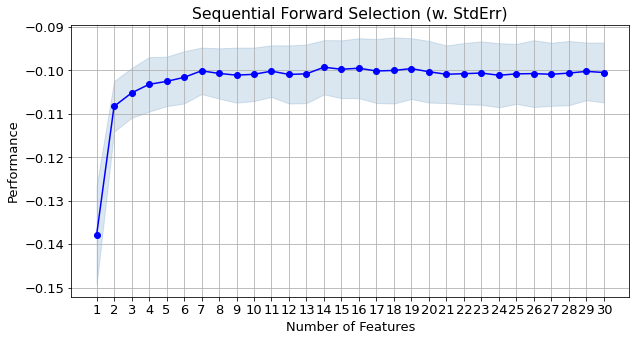

<Figure size 1080x360 with 0 Axes>

In [205]:
fig = plot_sfs(sfs_rf.get_metric_dict(), kind='std_err',figsize=(10,5))

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()
fig.savefig("rf_exp/sfs_rf_elimination.png")

In [191]:
sfs_rf.k_feature_names_

('comment_count',
 '🤡',
 '🤭',
 '🌛',
 '🍏',
 '🚀',
 '😩',
 '👄',
 '▶',
 '🍎',
 '🇲',
 '🌚',
 '🌖',
 '👁',
 '\U0001fa90',
 '📄',
 'Stocks',
 'Fundamentals',
 'Storytime',
 'others',
 'BA',
 'LMT',
 'F',
 'DIS',
 'CL',
 'WYNN',
 'XL',
 'GILD',
 'HOG',
 'moon')



For SFS_RF
RMSE: 0.10140337929345583
Absolute error is: 0.07647223496434025


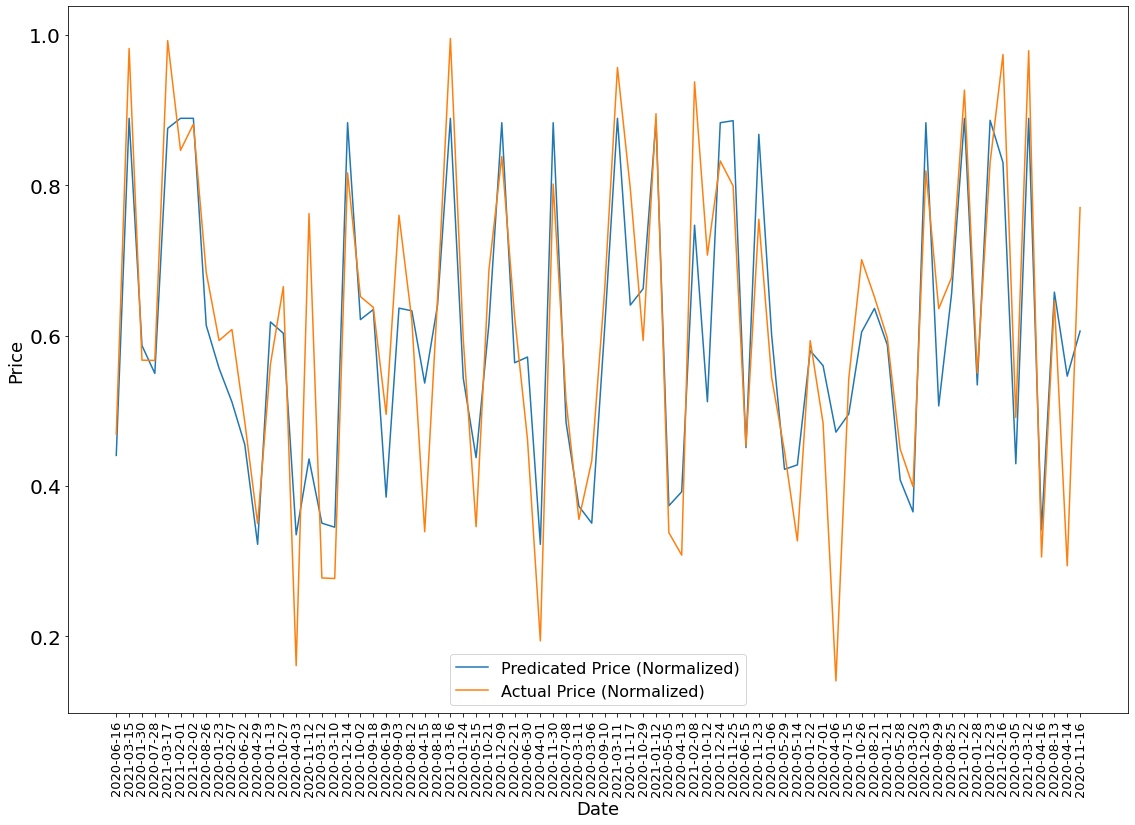

In [192]:
# Generate the new subsets based on the selected features
# Note that the transform call is equivalent to
# X_train[:, sfs1.k_feature_idx_]

X_train_sfs = sfs_rf.transform(X_train)
X_test_sfs = sfs_rf.transform(X_test)

# Fit the estimator using the new feature subset
# and make a prediction on the test data
rf.fit(X_train_sfs, y_train)
y_pred = rf.predict(X_test_sfs)


calculate_errors(y_pred,"SFS_RF")

In [207]:

importances = rf.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in rf.estimators_], axis=0)


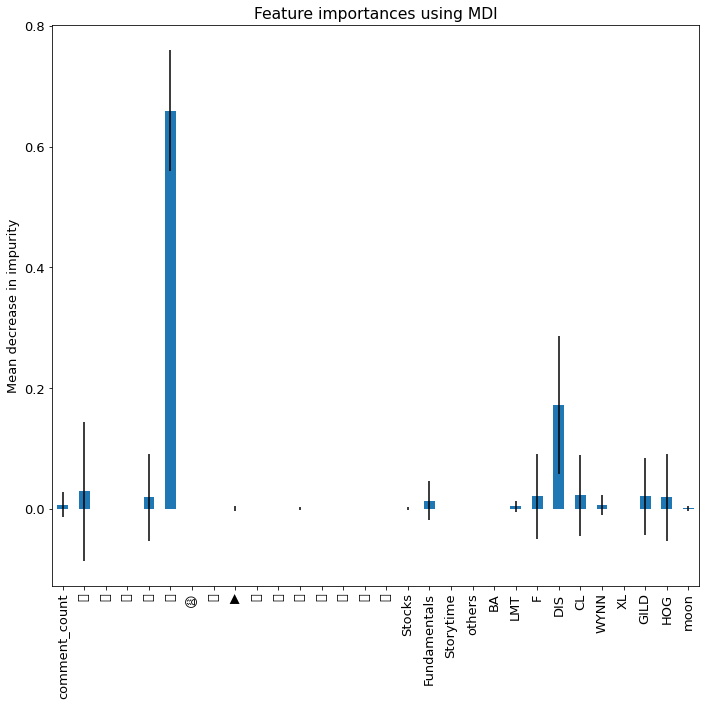

In [216]:
plt.rcParams.update({"font.size": 13, "figure.figsize": [15,5]})
forest_importances = pd.Series(importances, index=sfs_rf.k_feature_names_)

fig, ax = plt.subplots(figsize=(10,10))
forest_importances.plot.bar(yerr=std, ax=ax, align='center')
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
#ax.invert_yaxis()
fig.tight_layout()

In [210]:
fig.savefig("rf_exp/sfs_rf_MDI.png")